<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Step 1: Business Understanding</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      padding: 2rem;
      line-height: 1.6;
      background-color: #f9f9f9;
    }
    h1 {
      font-size: 2rem;
    }
    h2 {
      font-size: 1.5rem;
      margin-top: 1.5rem;
    }
    ul {
      margin-top: 0.5rem;
      padding-left: 1.2rem;
    }
    li {
      margin-bottom: 0.5rem;
    }
    .emoji {
      margin-right: 0.4rem;
    }
  </style>
</head>
<body>

  <h1><span class="emoji">🧠</span>Step 1: Business Understanding</h1>

  <h2><span class="emoji">🎯</span>Objective:</h2>
  <p>
    Create a recommendation system that finds the top 5 players most similar to a given player based on various performance and physical characteristics.
  </p>

  <h2><span class="emoji">✅</span>Questions to answer:</h2>
  <ul>
    <li>Who will use this system? (Analysts, scouts, gamers?)</li>
    <li>What kind of similarity matters? (Skill stats, physical stats, both?)</li>
    <li>Do we want to include all players or only by position, age group, etc.?</li>
  </ul>

</body>
</html>


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Step 2: Data Understanding</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      padding: 2rem;
      line-height: 1.6;
      background-color: #f9f9f9;
    }
    h1 {
      font-size: 2rem;
    }
    h2 {
      font-size: 1.5rem;
      margin-top: 1.5rem;
    }
    ul {
      margin-top: 0.5rem;
      padding-left: 1.2rem;
    }
    li {
      margin-bottom: 0.5rem;
    }
    .emoji {
      margin-right: 0.4rem;
    }
  </style>
</head>
<body>

  <h1><span class="emoji">📊</span>Step 2: Data Understanding</h1>

  <h2><span class="emoji">✅</span>Actions:</h2>
  <ul>
    <li>Load the dataset (CSV or Excel).</li>
    <li>Understand column types: numeric, categorical, text.</li>
    <li>Identify missing values.</li>
    <li>Explore unique values in key columns (Foot, Team & Contract, Body_type, etc.).</li>
  </ul>

</body>
</html>


In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("SOFIFA_17_Jan_2024.csv")

# Print the shape of the DataFrame
print("DataFrame Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("-" * 50)

# Print the column names
print("Columns in the DataFrame:")
print(df.columns)
print("-" * 50)



DataFrame Shape:
Rows: 9150, Columns: 79
--------------------------------------------------
Columns in the DataFrame:
Index(['Image_URL', 'Name', 'Age', 'Overall_rating', 'Potential',
       'Team&Contract', 'ID', 'Height', 'Weight', 'Foot', 'Best_Overall',
       'Best_Position', 'Growth', 'Joined', 'Loan_date_end', 'Value', 'Wage',
       'Release_clause', 'Total_attacking', 'Crossing', 'Finishing',
       'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill',
       'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control',
       'Total_movement', 'Acceleration', 'Sprint_speed', 'Agility',
       'Reactions', 'Balance', 'Total_power', 'Shot_power', 'Jumping',
       'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions',
       'Att_position', 'Vision', 'Penalties', 'Composure', 'Total_defending',
       'Defensive_awareness', 'Standing_tackle', 'Sliding_tackle',
       'Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking',
       'GK_Positionin

In [3]:
# Print data types of each column
print("Data Types of Columns:")
df.dtypes


Data Types of Columns:


Image_URL                object
Name                     object
Age                     float64
Overall_rating          float64
Potential               float64
                         ...   
Traits.1                float64
PlayStyles               object
PlayStyles +             object
Number_of_playstyles    float64
Acceleration_type        object
Length: 79, dtype: object

In [4]:
# Print the count of missing values per column
print("Missing Values Count per Column:")
print(df.isnull().sum())
print("-" * 50)




Missing Values Count per Column:
Image_URL                488
Name                     150
Age                      150
Overall_rating           150
Potential                150
                        ... 
Traits.1                9150
PlayStyles              2187
PlayStyles +            9062
Number_of_playstyles     150
Acceleration_type        150
Length: 79, dtype: int64
--------------------------------------------------


In [5]:
# Print the first few rows of the DataFrame
print("First 5 Rows of the DataFrame:")
print(df.head())
print("-" * 50)

First 5 Rows of the DataFrame:
                                           Image_URL                 Name  \
0  https://cdn.sofifa.net/players/239/085/24_60.p...                  NaN   
1  https://cdn.sofifa.net/players/239/085/24_60.p...        E. Haaland ST   
2  https://cdn.sofifa.net/players/239/085/24_60.p...      K. Mbappé ST LW   
3  https://cdn.sofifa.net/players/239/085/24_60.p...  K. De Bruyne CM CAM   
4  https://cdn.sofifa.net/players/239/085/24_60.p...           H. Kane ST   

    Age  Overall_rating  Potential                     Team&Contract  \
0   NaN             NaN        NaN                               NaN   
1  22.0            91.0       94.0      Manchester City\n2022 ~ 2027   
2  24.0            91.0       94.0  Paris Saint-Germain\n2018 ~ 2024   
3  32.0            91.0       91.0      Manchester City\n2015 ~ 2025   
4  29.0            90.0       90.0    FC Bayern München\n2023 ~ 2027   

         ID         Height         Weight   Foot  ...  Passing / Kicking 

In [6]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:")
print(numerical_columns)


Numerical Columns:
['Age', 'Overall_rating', 'Potential', 'ID', 'Best_Overall', 'Growth', 'Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure', 'Total_defending', 'Defensive_awareness', 'Standing_tackle', 'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats', 'Base_stats', 'Weak_foot', 'Skill_moves', 'International_reputation', 'Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes', 'Defending / Pace', 'Physical / Positioning', 'Traits', 'Traits.1', 'Number_of_playstyles']


In [7]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
['Image_URL', 'Name', 'Team&Contract', 'Height', 'Weight', 'Foot', 'Best_Position', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Attacking_work_rate', 'Defensive_work_rate', 'Body_type', 'Real_face', 'PlayStyles', 'PlayStyles +', 'Acceleration_type']


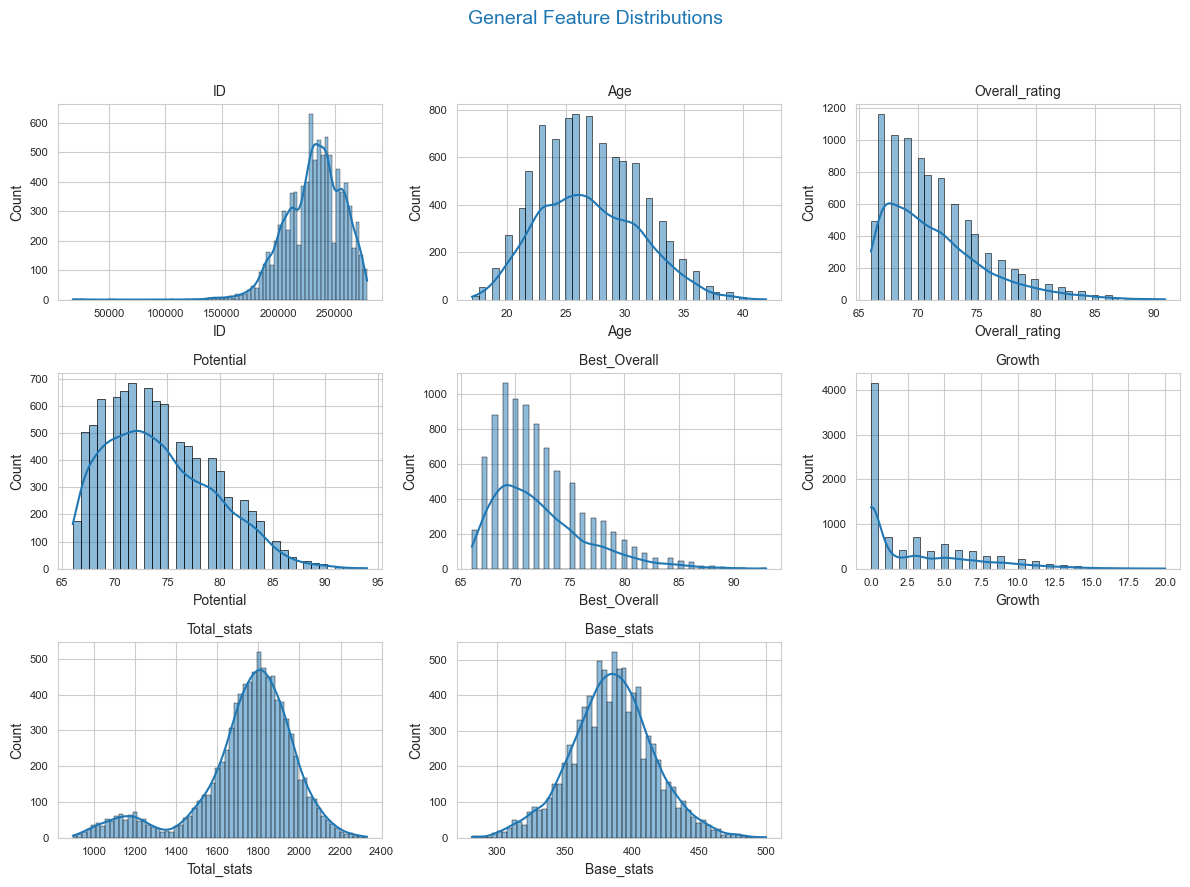

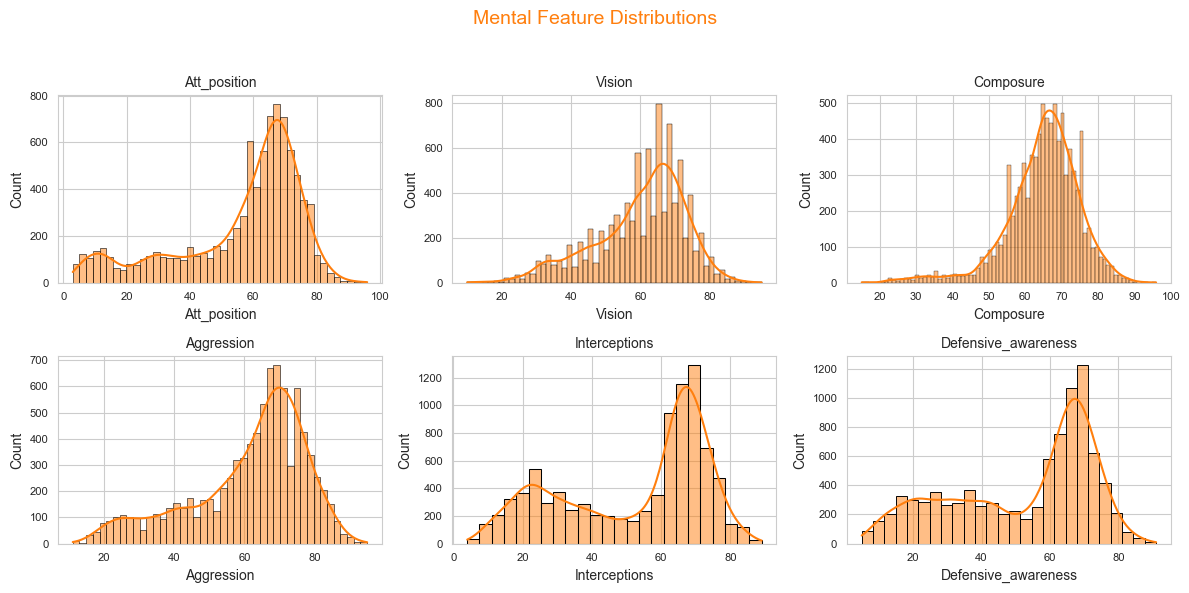

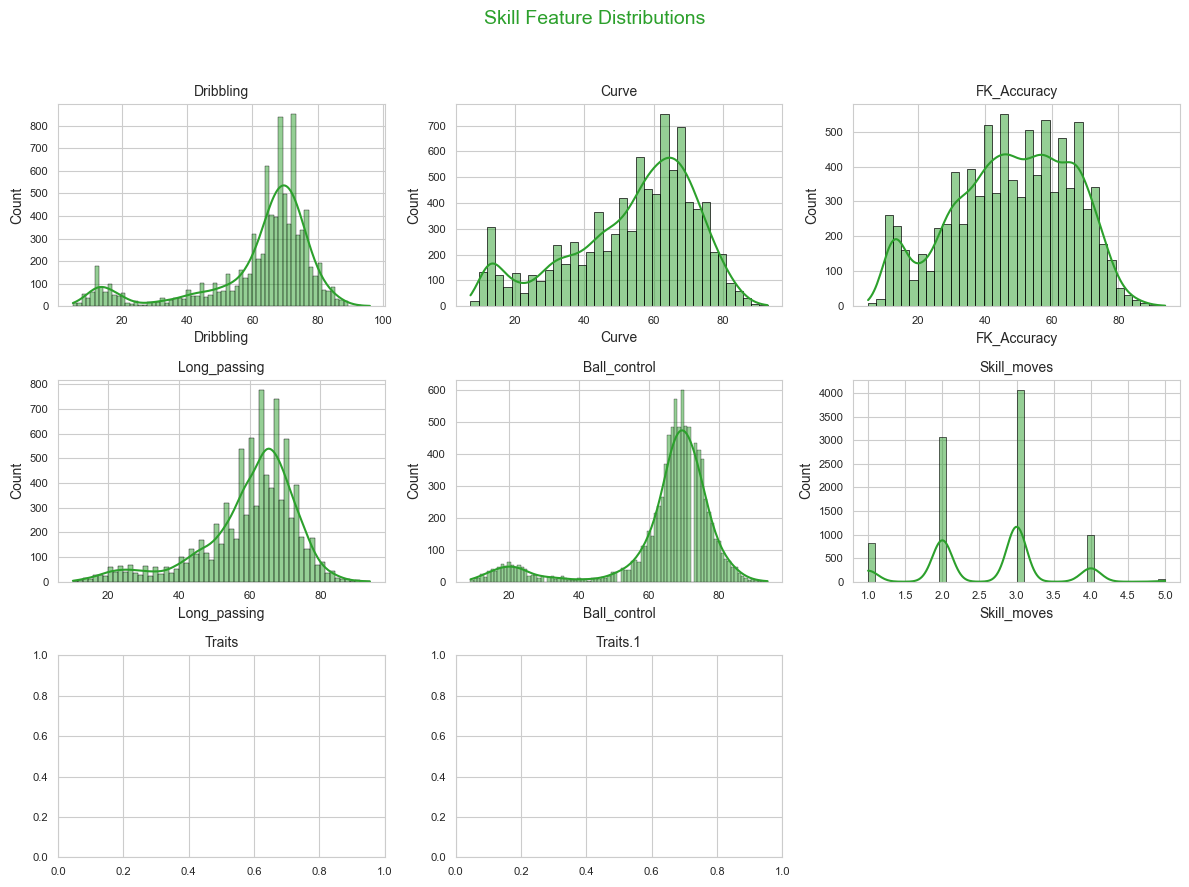

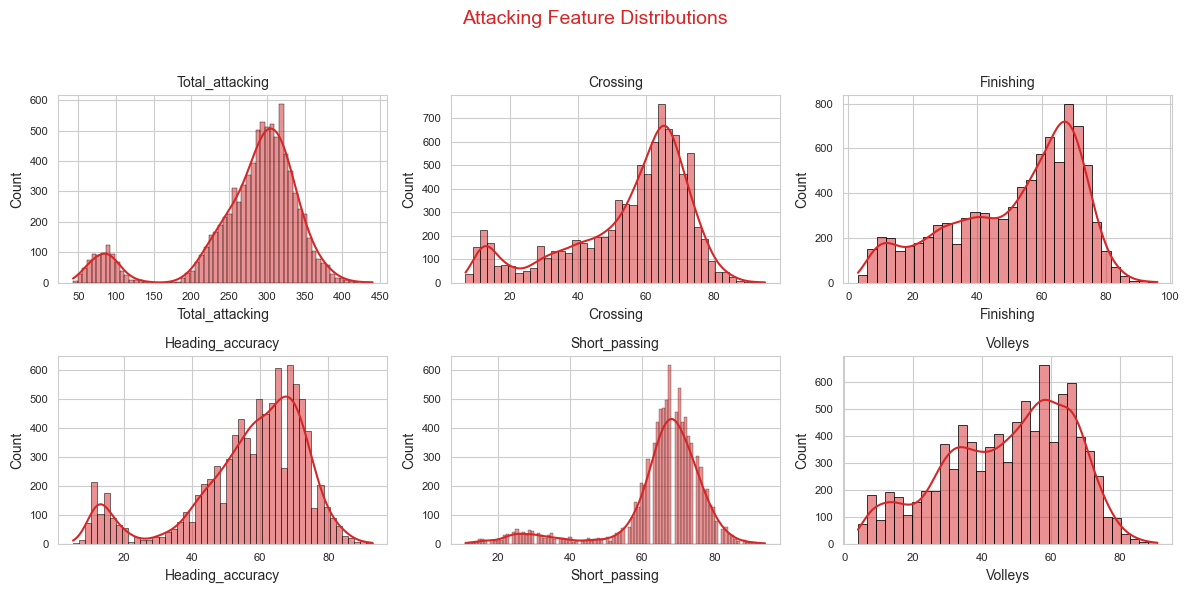

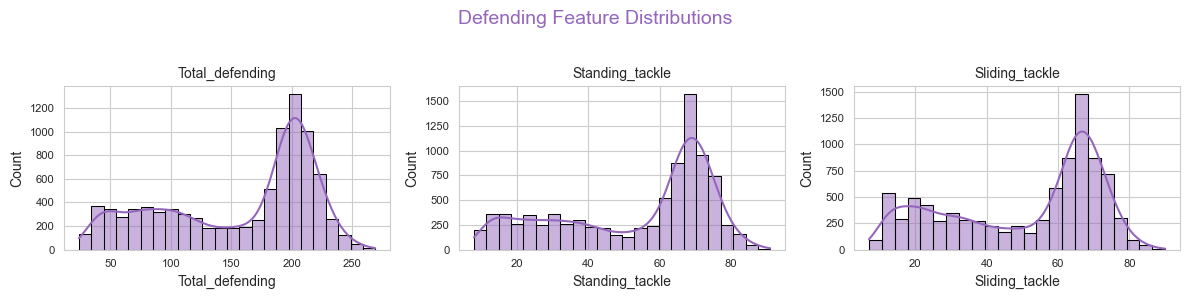

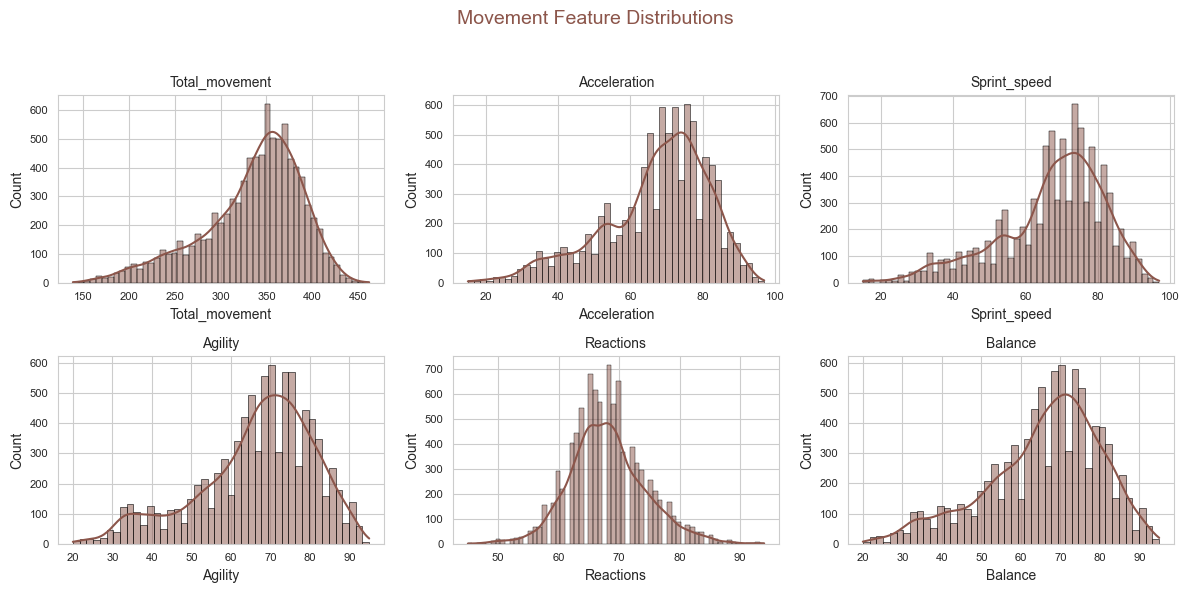

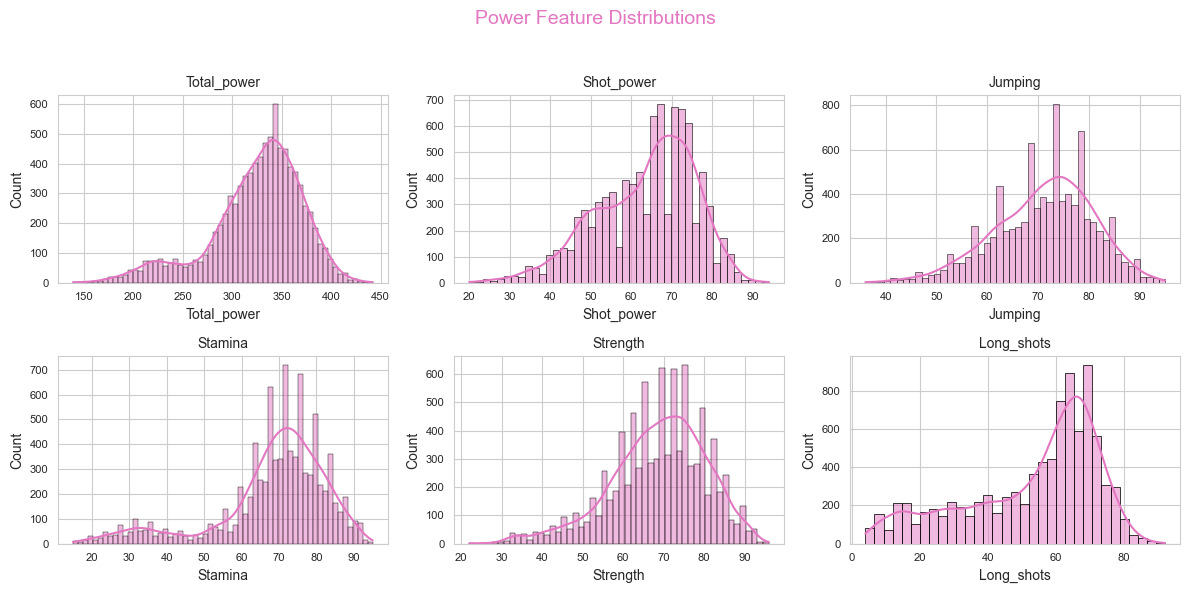

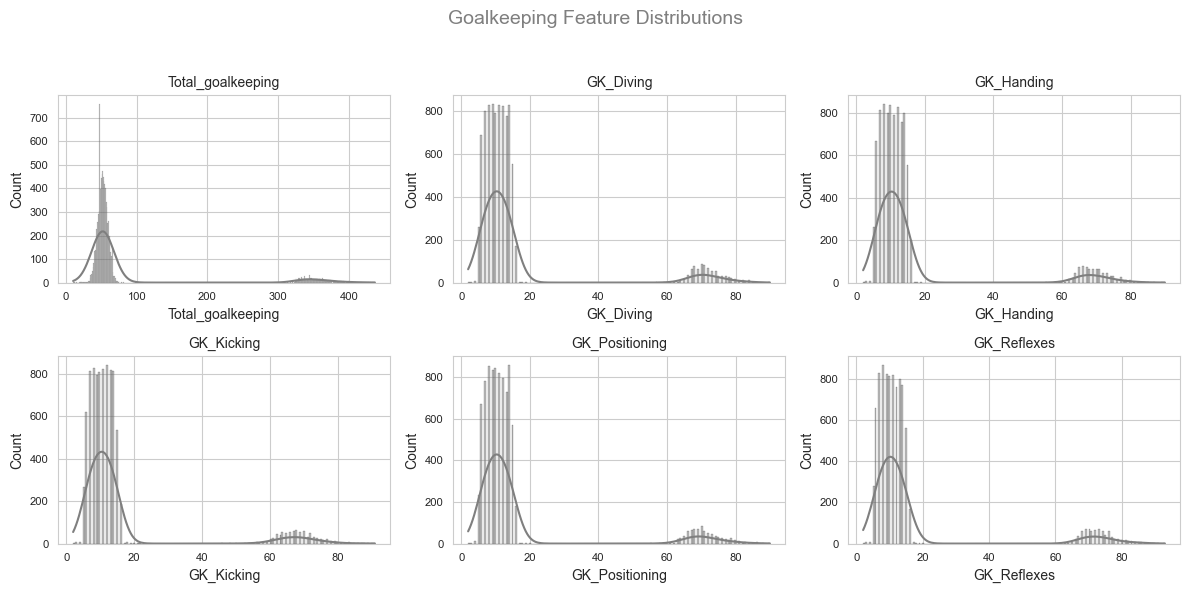

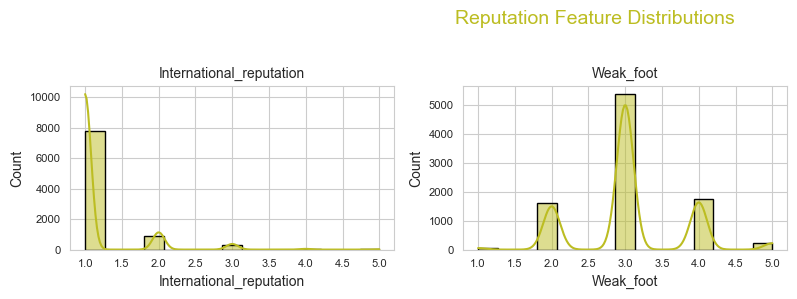

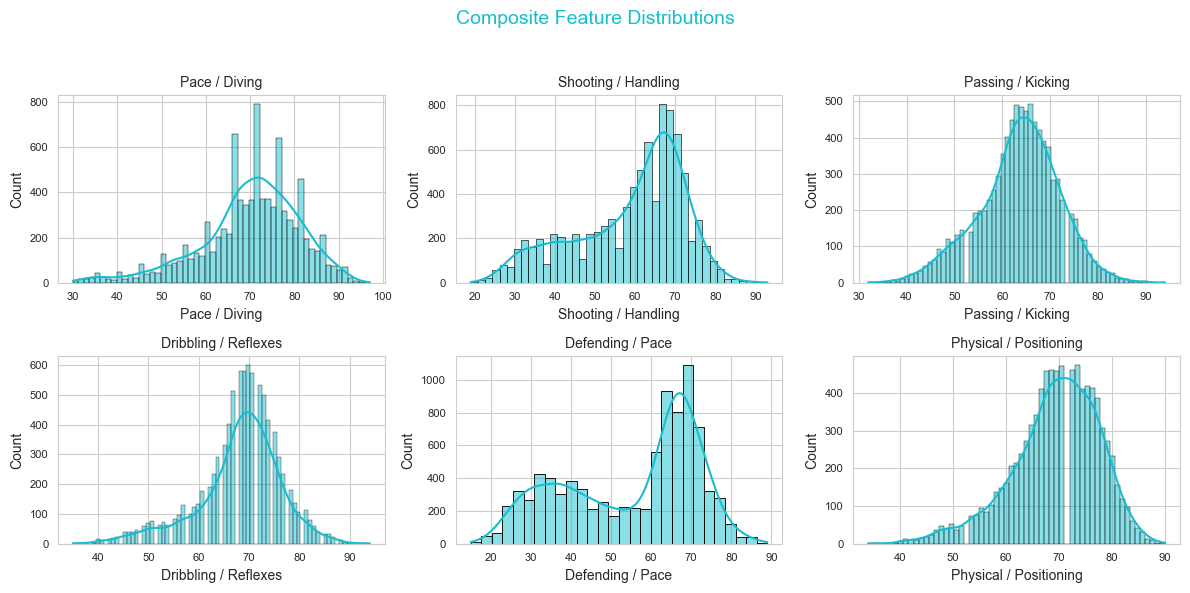

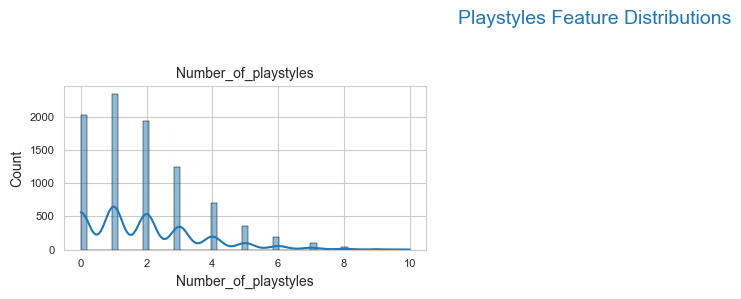

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_style("whitegrid")

# Define numerical features and categories
numerical_features = ['Age', 'Overall_rating', 'Potential', 'ID', 'Best_Overall', 'Growth', 'Total_attacking',
                      'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill',
                      'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Total_movement',
                      'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Total_power',
                      'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions',
                      'Att_position', 'Vision', 'Penalties', 'Composure', 'Total_defending',
                      'Defensive_awareness', 'Standing_tackle', 'Sliding_tackle', 'Total_goalkeeping',
                      'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
                      'Base_stats', 'Weak_foot', 'Skill_moves', 'International_reputation', 'Pace / Diving',
                      'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes', 'Defending / Pace',
                      'Physical / Positioning', 'Traits', 'Traits.1', 'Number_of_playstyles']

feature_groups = {
    'General': ['ID', 'Age', 'Overall_rating', 'Potential', 'Best_Overall', 'Growth', 'Total_stats', 'Base_stats'],
    'Mental': ['Att_position', 'Vision', 'Composure', 'Aggression', 'Interceptions', 'Defensive_awareness'],
    'Skill': ['Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Skill_moves', 'Traits', 'Traits.1'],
    'Attacking': ['Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys'],
    'Defending': ['Total_defending', 'Standing_tackle', 'Sliding_tackle'],
    'Movement': ['Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance'],
    'Power': ['Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots'],
    'Goalkeeping': ['Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes'],
    'Reputation': ['International_reputation', 'Weak_foot'],
    'Composite': ['Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                  'Defending / Pace', 'Physical / Positioning'],
    'Playstyles': ['Number_of_playstyles']
}

# Category-specific color palettes (optional tweak)
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Filter features actually in df
filtered_feature_groups = {
    group: [feat for feat in feats if feat in df.columns]
    for group, feats in feature_groups.items()
}

# Plotting: all features per group side by side
for group_name, features in filtered_feature_groups.items():
    n = len(features)
    cols = 3  # number of subplots per row
    rows = (n + cols - 1) // cols  # compute needed rows

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    fig.suptitle(f'{group_name} Feature Distributions', fontsize=14, color=group_color_map[group_name])
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(df[feature].dropna(), kde=True, ax=axes[i],
                     color=group_color_map[group_name], edgecolor='black')
        axes[i].set_title(feature, fontsize=10)
        axes[i].tick_params(axis='x', labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


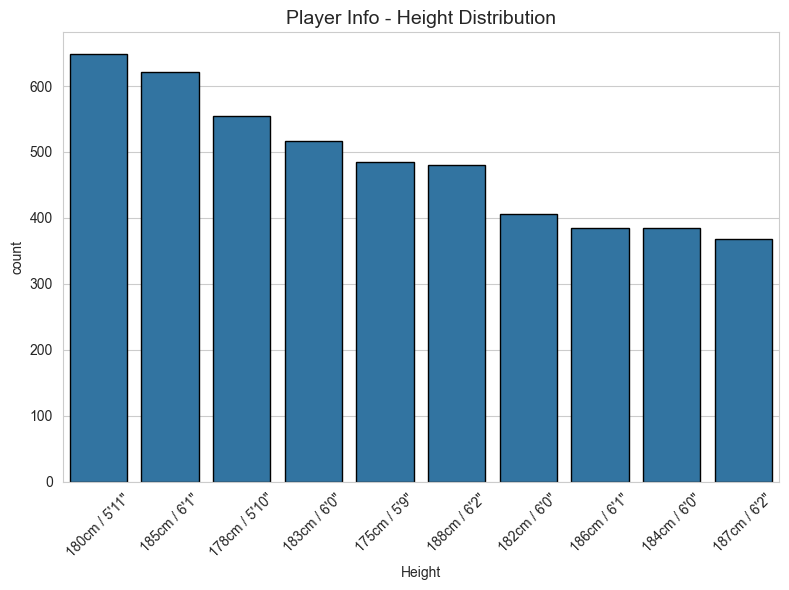

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


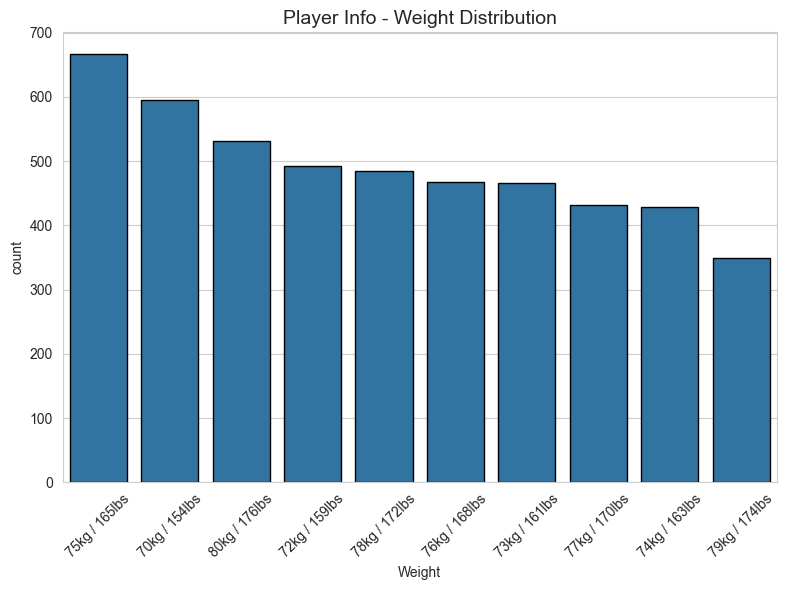

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


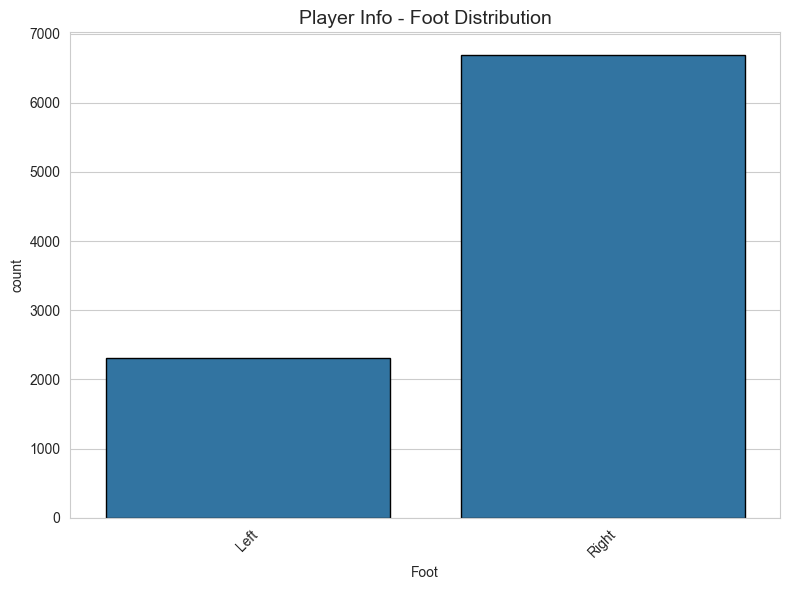

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


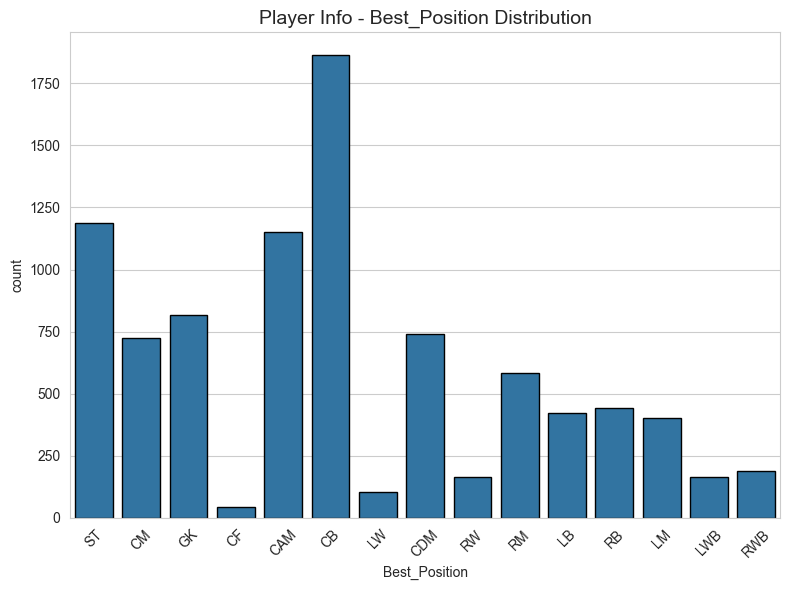

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


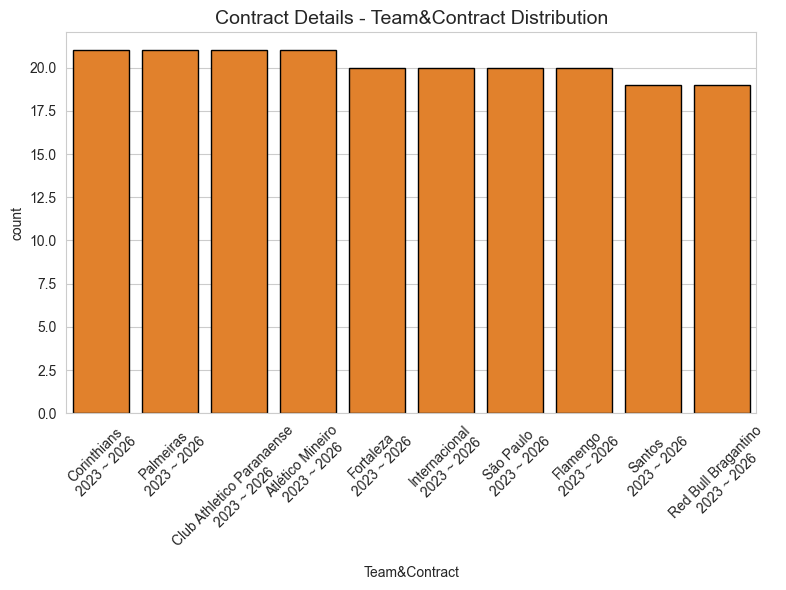

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


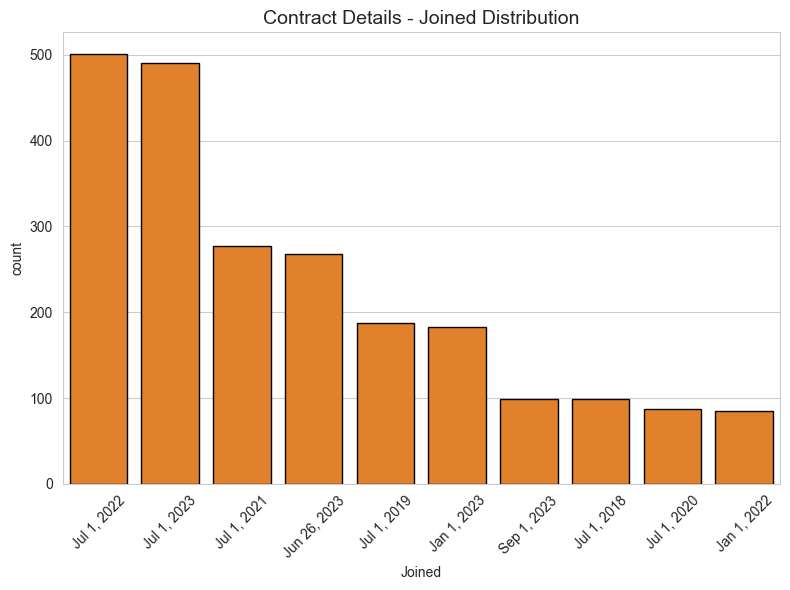

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


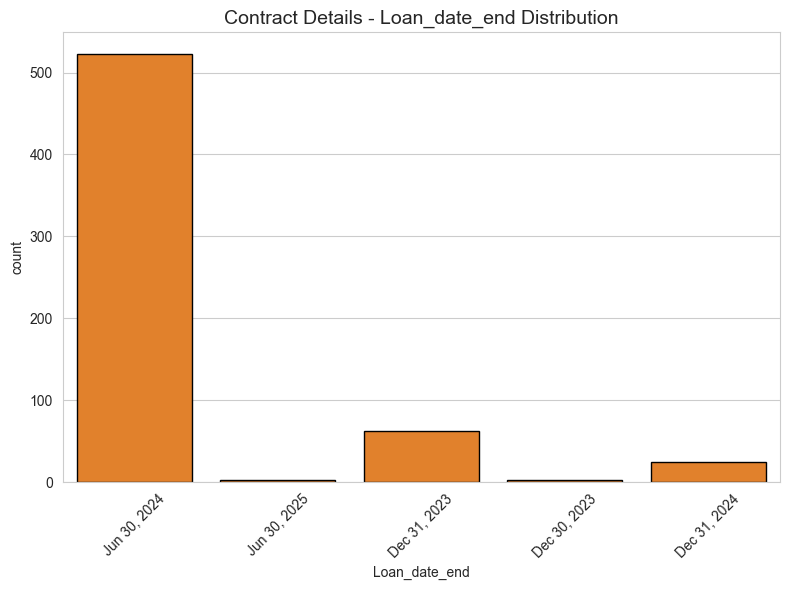

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


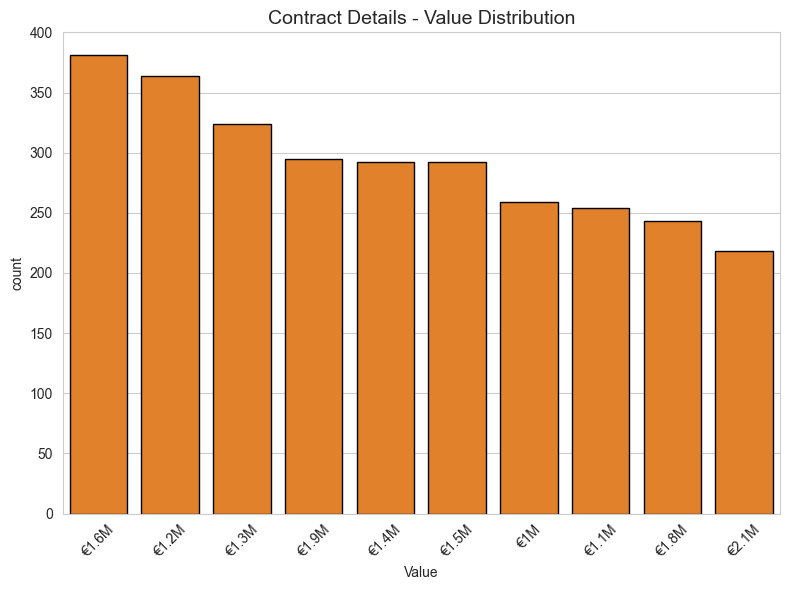

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


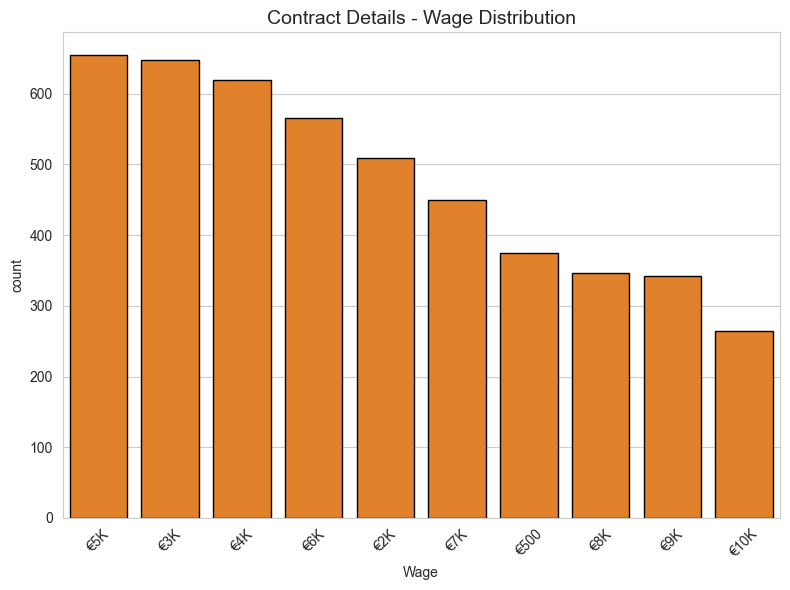

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


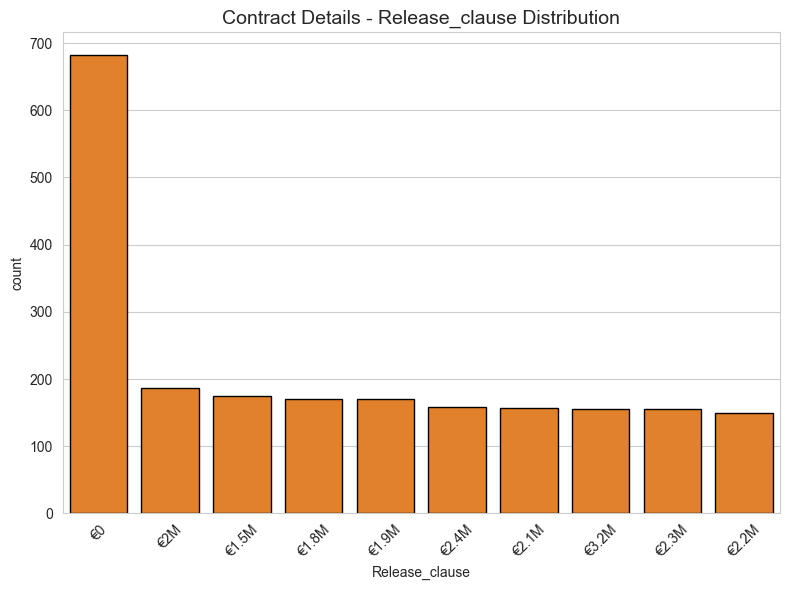

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


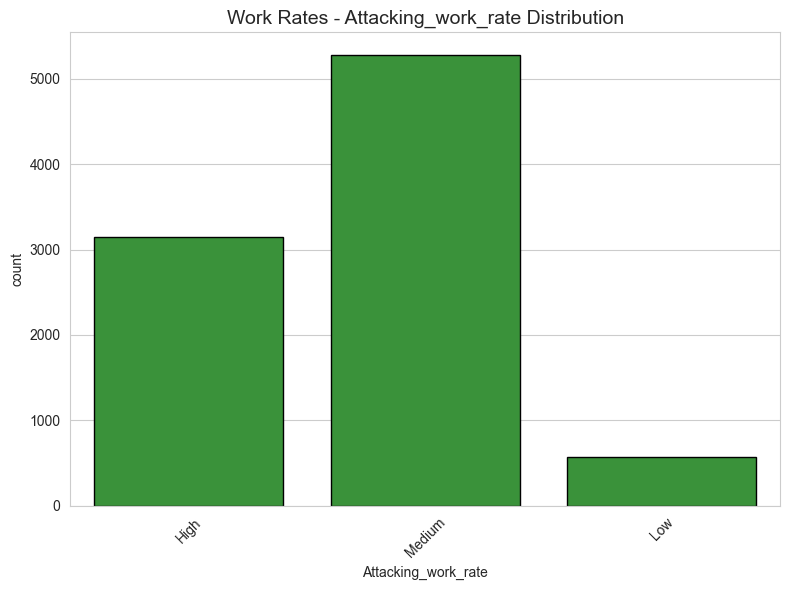

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


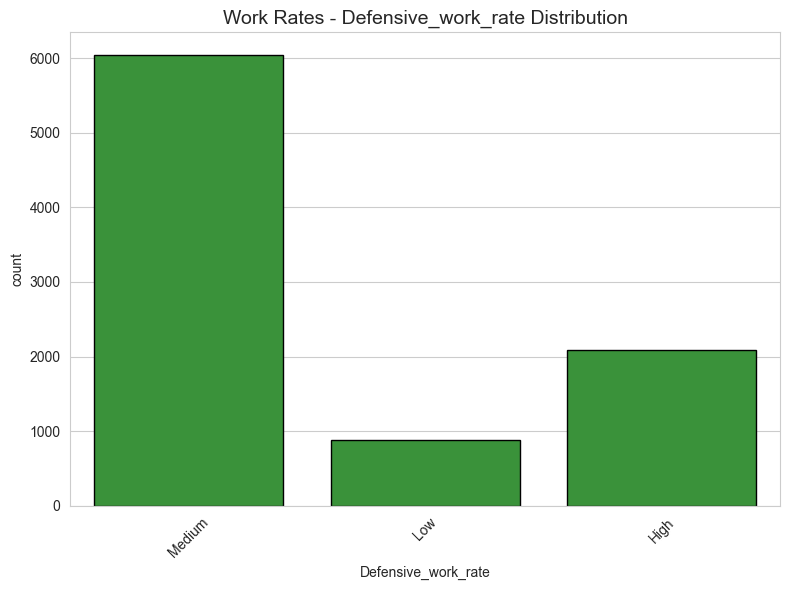

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


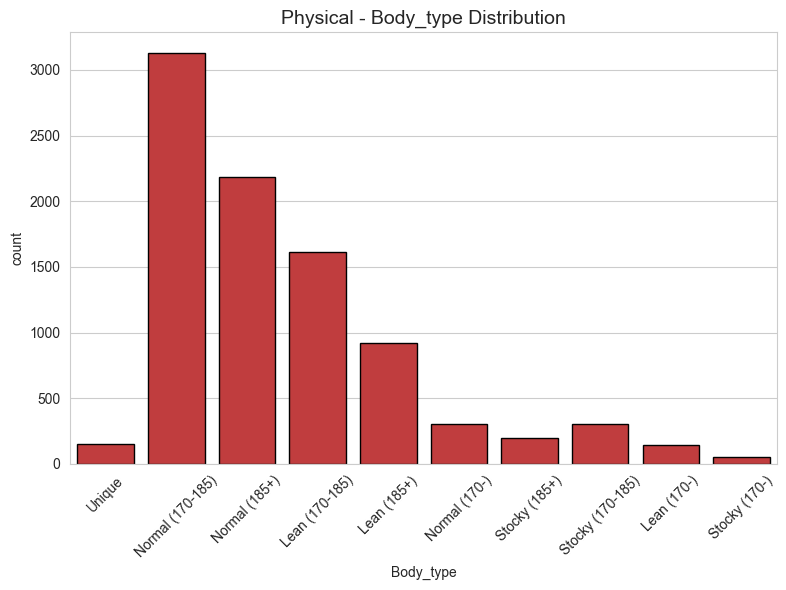

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


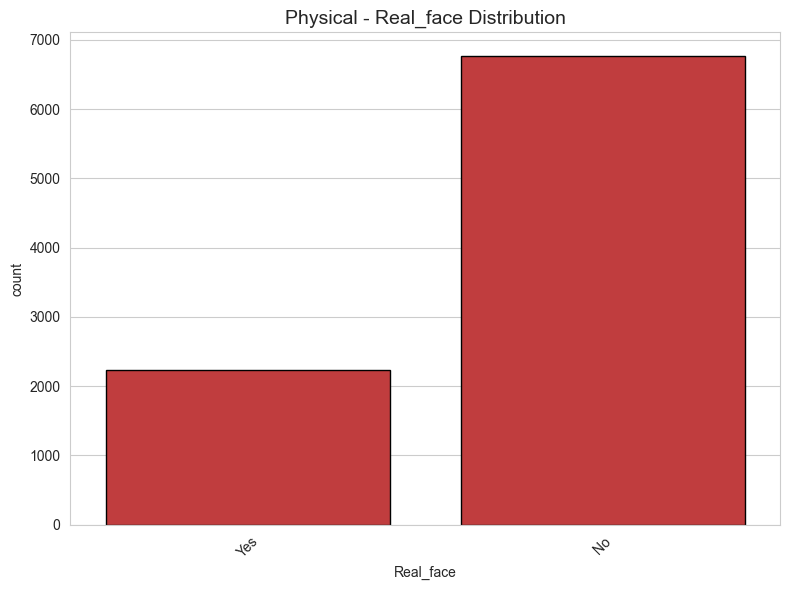

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


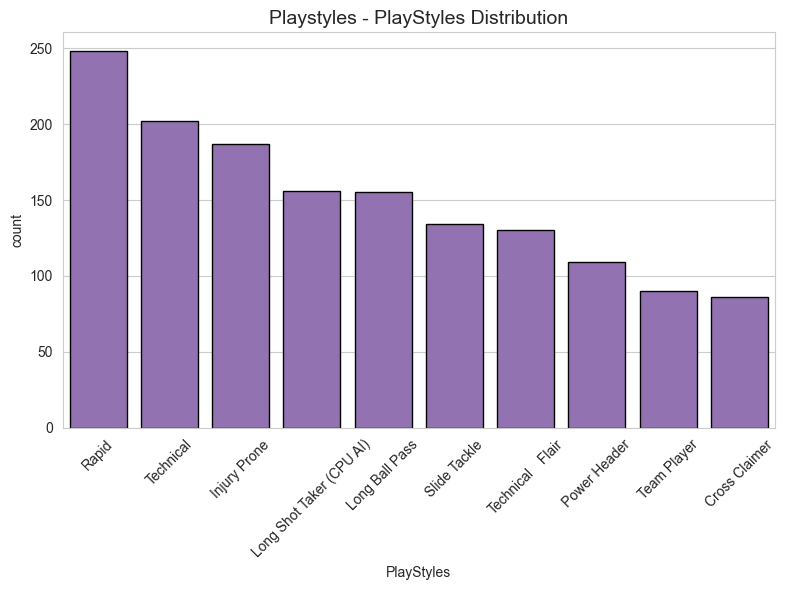

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)


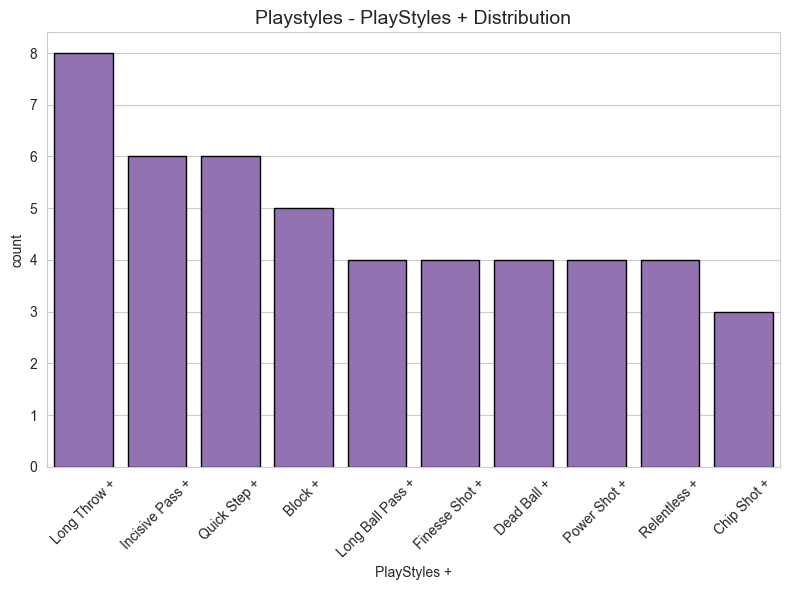

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/3538326619.py:43: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')


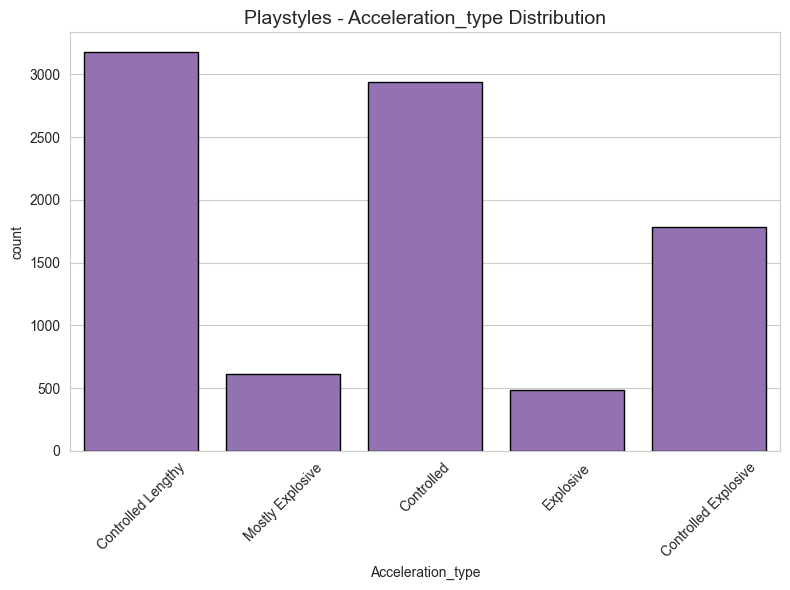

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_style("whitegrid")

# Define categorical features and categories
categorical_features = ['Team&Contract', 'Height', 'Weight', 'Foot', 
                        'Best_Position', 'Joined', 'Loan_date_end', 'Value', 'Wage', 
                        'Release_clause', 'Attacking_work_rate', 'Defensive_work_rate', 
                        'Body_type', 'Real_face', 'PlayStyles', 'PlayStyles +', 'Acceleration_type']

feature_groups = {
    'Player Info': [ 'Height', 'Weight', 'Foot', 'Best_Position'],
    'Contract Details': ['Team&Contract', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause'],
    'Work Rates': ['Attacking_work_rate', 'Defensive_work_rate'],
    'Physical': ['Body_type', 'Real_face'],
    'Playstyles': ['PlayStyles', 'PlayStyles +', 'Acceleration_type']
}

# Category-specific color palettes
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Filter features actually in df
filtered_feature_groups = {
    group: [feat for feat in feats if feat in df.columns]
    for group, feats in feature_groups.items()
}

# Plotting: each feature in a separate figure, one under the other
for group_name, features in filtered_feature_groups.items():
    for feature in features:
        # Create a new figure for each plot (one under the other)
        plt.figure(figsize=(8, 6))  # Adjusting the overall figure size
        
        # Only show the top 10 categories if there are more than 20 unique categories
        if df[feature].nunique() > 20:
            top_categories = df[feature].value_counts().nlargest(10).index
            sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
        else:
            sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
        
        plt.title(f'{group_name} - {feature} Distribution', fontsize=14)
        plt.tick_params(axis='x', labelsize=10, rotation=45)  # Rotate x-axis labels if needed
        plt.tick_params(axis='y', labelsize=10)
        plt.tight_layout()
        plt.show()


In [10]:
# Dropping the specified columns from the DataFrame
df = df.drop(columns=['Image_URL', 'Name', 'ID', 'Traits', 'Traits.1'])

# Verify that the columns have been dropped
print(df.columns)


Index(['Age', 'Overall_rating', 'Potential', 'Team&Contract', 'Height',
       'Weight', 'Foot', 'Best_Overall', 'Best_Position', 'Growth', 'Joined',
       'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Total_attacking',
       'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys',
       'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing',
       'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed',
       'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression',
       'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure',
       'Total_defending', 'Defensive_awareness', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
       'Base_stats', 'Weak_foot', 'Skill_moves', 'Attacking_work_rate',
       'Defensive_work_rate', 'International_r

In [11]:
import pandas as pd

# Replace missing values in numerical columns with the mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Replace missing values in categorical columns with the most frequent value (mode)
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Confirm that missing values are replaced
print("Missing values after replacement:")
print(df.isnull().sum())


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/1234393075.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Missing values after replacement:
Age                       0
Overall_rating            0
Potential                 0
Team&Contract             0
Height                    0
                         ..
Physical / Positioning    0
PlayStyles                0
PlayStyles +              0
Number_of_playstyles      0
Acceleration_type         0
Length: 74, dtype: int64


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/1234393075.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


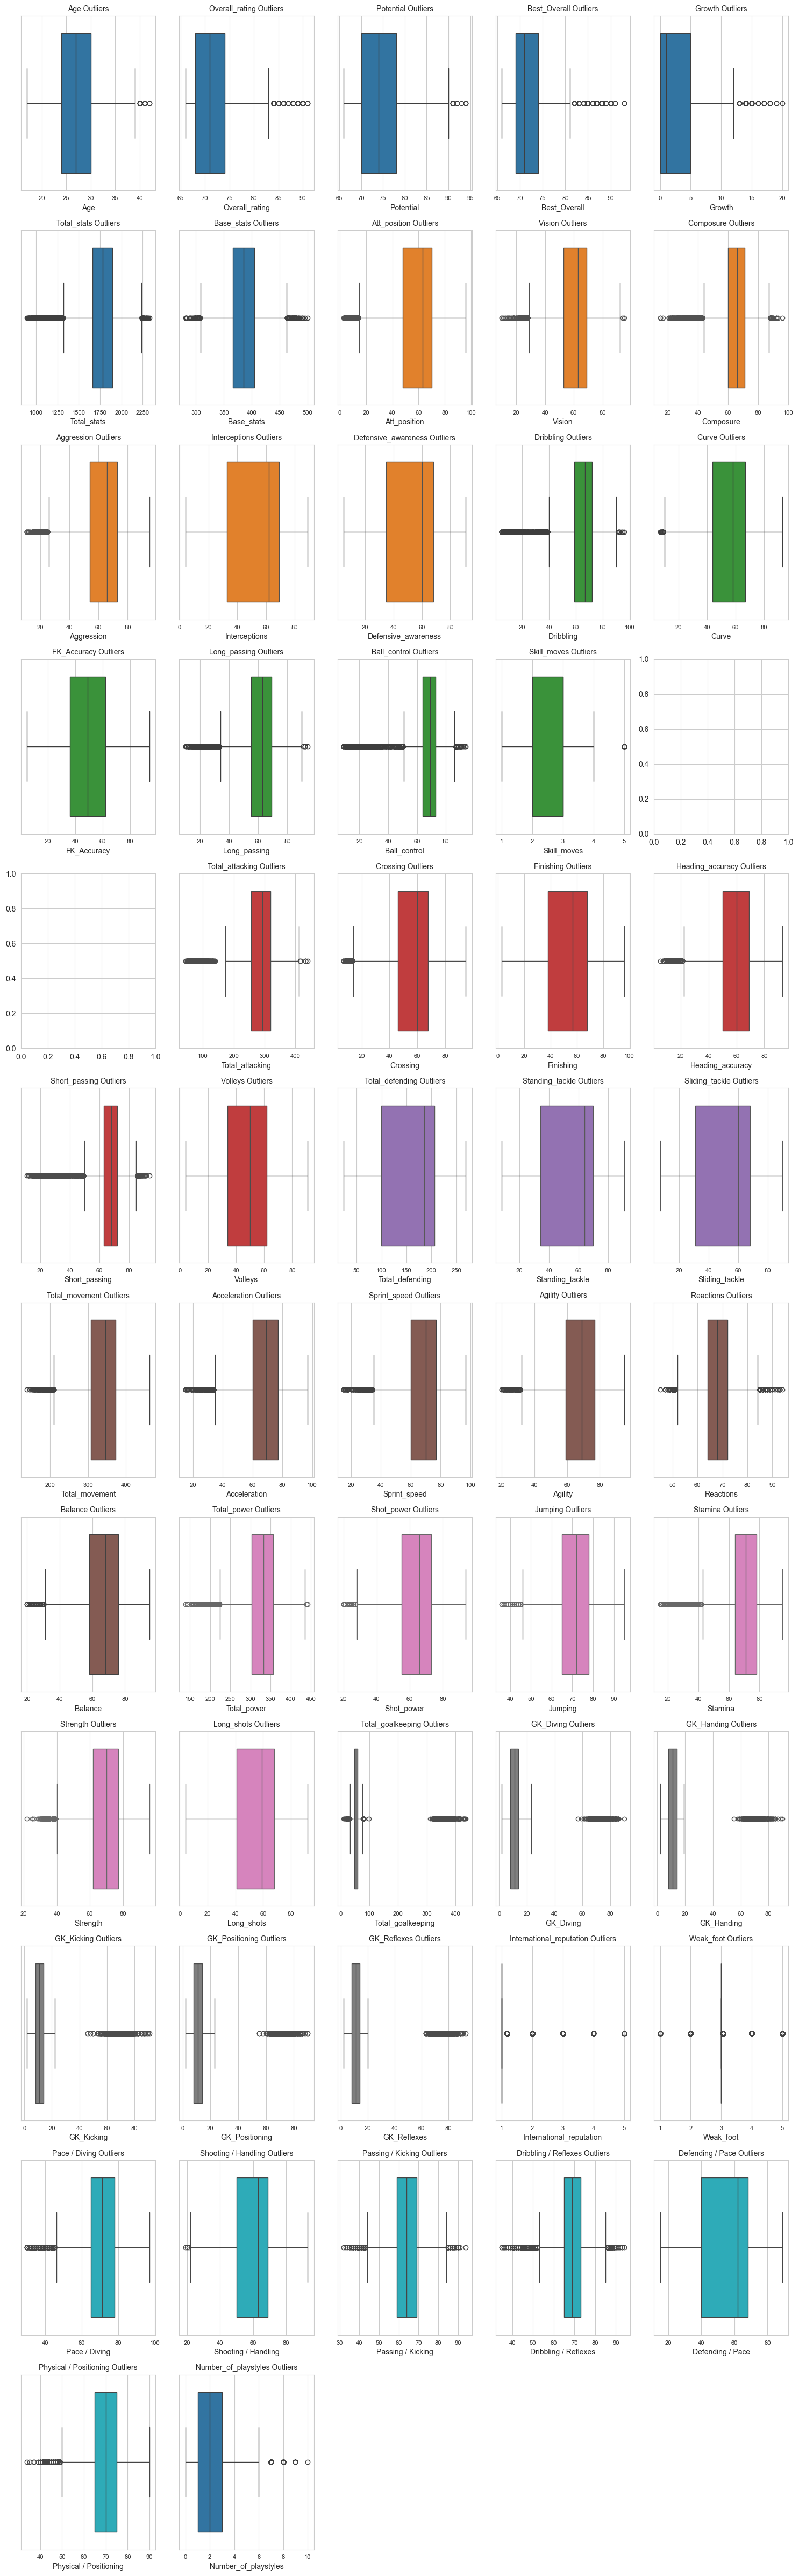

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame with the data


# Feature groups as per your request
feature_groups = {
   'General': ['Age', 'Overall_rating', 'Potential', 'Best_Overall', 'Growth', 'Total_stats', 'Base_stats'],
    'Mental': ['Att_position', 'Vision', 'Composure', 'Aggression', 'Interceptions', 'Defensive_awareness'],
    'Skill': ['Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Skill_moves', 'Traits', 'Traits.1'],
    'Attacking': ['Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys'],
    'Defending': ['Total_defending', 'Standing_tackle', 'Sliding_tackle'],
    'Movement': ['Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance'],
    'Power': ['Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots'],
    'Goalkeeping': ['Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes'],
    'Reputation': ['International_reputation', 'Weak_foot'],
    'Composite': ['Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                  'Defending / Pace', 'Physical / Positioning'],
    'Playstyles': ['Number_of_playstyles']
}

# Flatten the list of all features
all_features = [feat for feats in feature_groups.values() for feat in feats]

# Color Palette for the feature groups
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Calculate grid dimensions dynamically based on the number of features
n_features = len(all_features)
n_cols = 5  # Number of columns in the grid
n_rows = np.ceil(n_features / n_cols).astype(int)  # Number of rows (rounded up)

# Define the grid for plotting
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust height for larger number of rows
axes = axes.flatten()  # Flatten axes to iterate over

# Loop through the features and create boxplots
for i, feature in enumerate(all_features):
    if feature in df.columns:  # Ensure the feature exists in the dataframe
        # Find the group that the feature belongs to
        group_name = None
        for group, features in feature_groups.items():
            if feature in features:
                group_name = group
                break
        
        # Ensure we do not exceed the number of axes available
        if i < len(axes):
            sns.boxplot(x=df[feature], color=group_color_map[group_name], ax=axes[i])
            axes[i].set_title(f'{feature} Outliers', fontsize=10)
            axes[i].tick_params(axis='x', labelsize=8)
            axes[i].tick_params(axis='y', labelsize=8)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


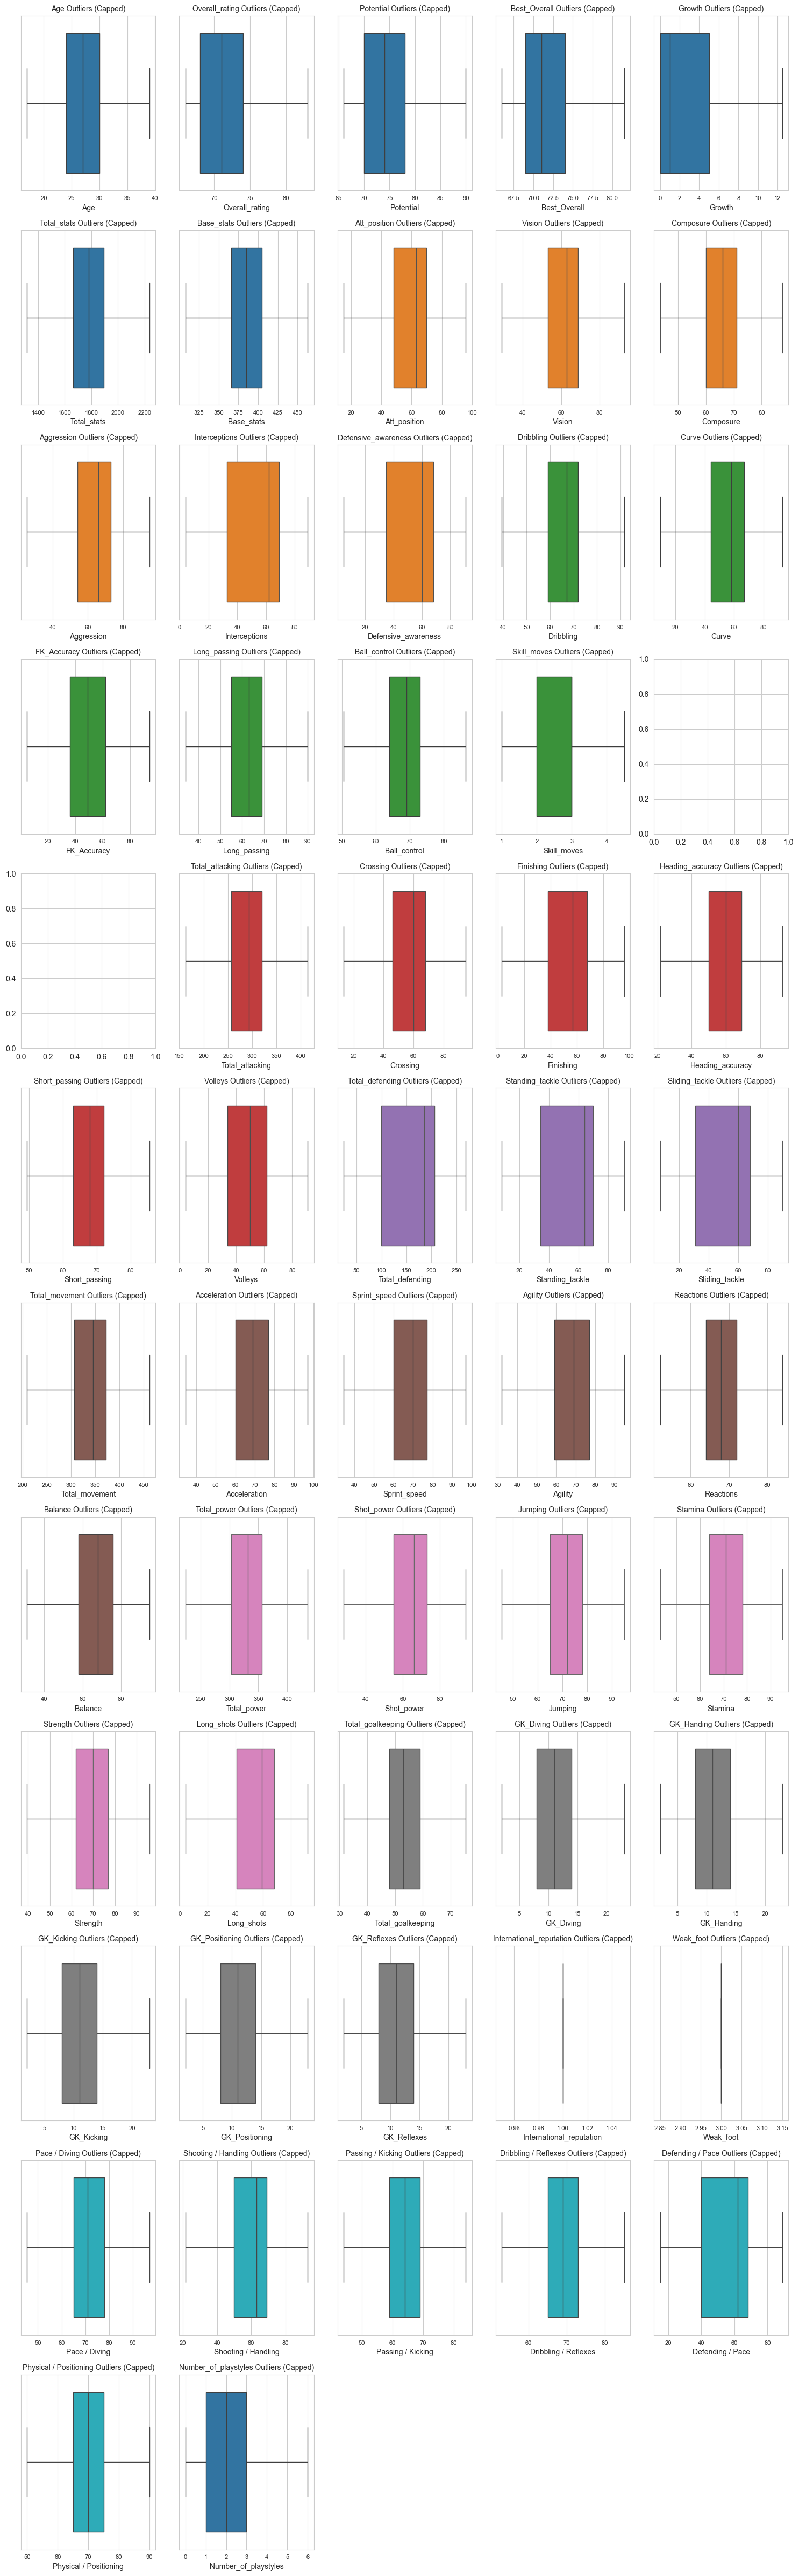

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame with the data

# Feature groups as per your request
feature_groups = {
    'General': ['Age', 'Overall_rating', 'Potential', 'Best_Overall', 'Growth', 'Total_stats', 'Base_stats'],
    'Mental': ['Att_position', 'Vision', 'Composure', 'Aggression', 'Interceptions', 'Defensive_awareness'],
    'Skill': ['Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Skill_moves', 'Traits', 'Traits.1'],
    'Attacking': ['Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys'],
    'Defending': ['Total_defending', 'Standing_tackle', 'Sliding_tackle'],
    'Movement': ['Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance'],
    'Power': ['Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots'],
    'Goalkeeping': ['Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes'],
    'Reputation': ['International_reputation', 'Weak_foot'],
    'Composite': ['Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                  'Defending / Pace', 'Physical / Positioning'],
    'Playstyles': ['Number_of_playstyles']
}

# Flatten the list of all features
all_features = [feat for feats in feature_groups.values() for feat in feats]

# Color Palette for the feature groups
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Function for capping outliers
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)
    return df

# Apply capping to outliers for each feature
for feature in all_features:
    if feature in df.columns:  # Ensure the feature exists in the dataframe
        df = cap_outliers(df, feature)

# Replot the boxplots after capping outliers
n_features = len(all_features)
n_cols = 5  # Number of columns in the grid
n_rows = np.ceil(n_features / n_cols).astype(int)  # Number of rows (rounded up)

# Define the grid for plotting
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust height for larger number of rows
axes = axes.flatten()  # Flatten axes to iterate over

# Loop through the features and create boxplots
for i, feature in enumerate(all_features):
    if feature in df.columns:  # Ensure the feature exists in the dataframe
        # Find the group that the feature belongs to
        group_name = None
        for group, features in feature_groups.items():
            if feature in features:
                group_name = group
                break
        
        # Ensure we do not exceed the number of axes available
        if i < len(axes):
            sns.boxplot(x=df[feature], color=group_color_map[group_name], ax=axes[i])
            axes[i].set_title(f'{feature} Outliers (Capped)', fontsize=10)
            axes[i].tick_params(axis='x', labelsize=8)
            axes[i].tick_params(axis='y', labelsize=8)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [14]:
# Check for duplicated column names
duplicated_columns = df.columns[df.columns.duplicated()].unique()

# Display the duplicated columns
print(f"Duplicated columns: {duplicated_columns}")

# If you want to drop duplicated columns (keeping the first occurrence)
df = df.loc[:, ~df.columns.duplicated()]

# Verify the columns after dropping duplicates
print(f"Columns after removing duplicates: {df.columns}")


Duplicated columns: Index([], dtype='object')
Columns after removing duplicates: Index(['Age', 'Overall_rating', 'Potential', 'Team&Contract', 'Height',
       'Weight', 'Foot', 'Best_Overall', 'Best_Position', 'Growth', 'Joined',
       'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Total_attacking',
       'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys',
       'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing',
       'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed',
       'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression',
       'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure',
       'Total_defending', 'Defensive_awareness', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
       'Base_stats', 'Weak_foot', 'Sk

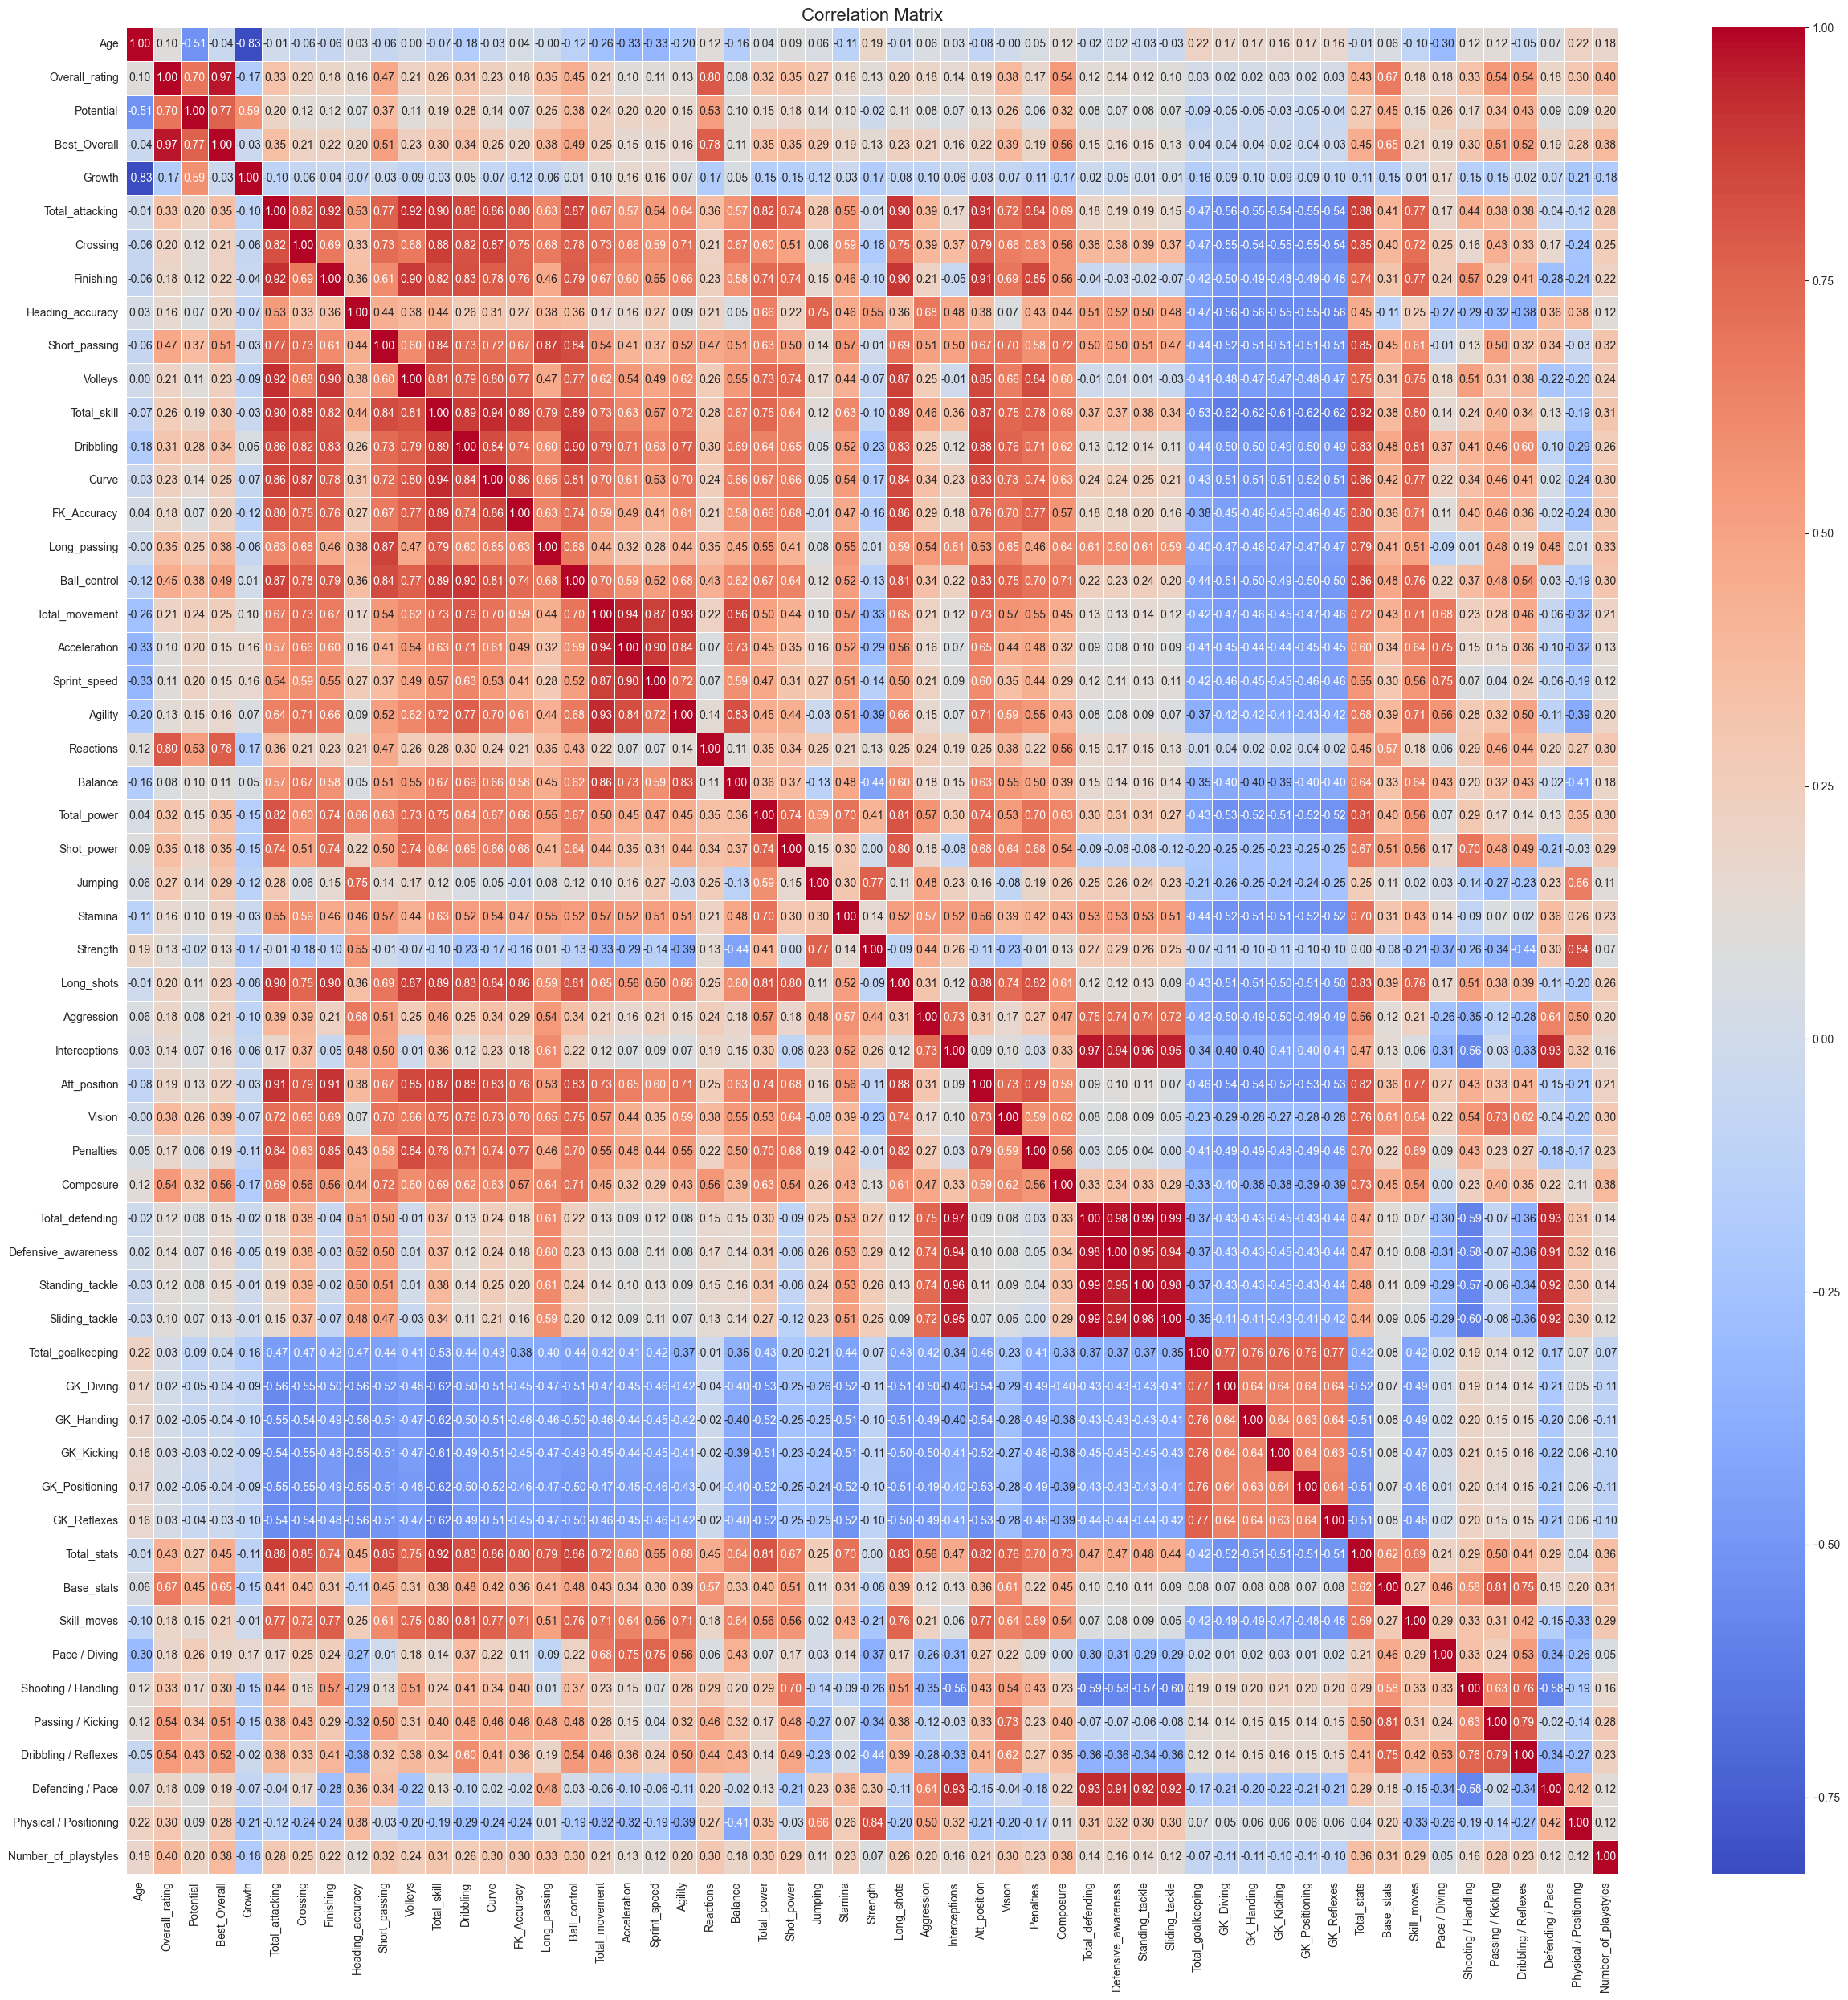

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Drop 'International_reputation' and 'Weak_foot' from the numeric columns
numeric_df = numeric_df.drop(columns=['International_reputation', 'Weak_foot'], errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 25))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and adjust layout
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

# Your feature groups containing categorical features
feature_groups = {
    'Player Info': ['Height', 'Weight', 'Foot', 'Best_Position'],
    'Contract Details': ['Team&Contract', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause'],
    'Work Rates': ['Attacking_work_rate', 'Defensive_work_rate'],
    'Physical': ['Body_type', 'Real_face'],
    'Playstyles': ['PlayStyles', 'PlayStyles +', 'Acceleration_type']
}

# Flatten the list of categorical features
categorical_features = [feat for feats in feature_groups.values() for feat in feats]

# Label encoding for categorical features
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical feature
for feature in categorical_features:
    if feature in df.columns:
        df[feature] = label_encoder.fit_transform(df[feature])

# Show a snippet of the transformed DataFrame
print(df[categorical_features].head())


   Height  Weight  Foot  Best_Position  Team&Contract  Joined  Loan_date_end  \
0      23      26     1              1            587     692              3   
1      38      45     0             14           3080     692              3   
2      25      26     1             14           3534     688              3   
3      24      26     1              4           3069     209              3   
4      31      36     1             14           1728      91              3   

   Value  Wage  Release_clause  Attacking_work_rate  Defensive_work_rate  \
0      6    88               0                    2                    2   
1     48    56             357                    0                    2   
2     47    38             347                    0                    1   
3     15    58             163                    0                    2   
4     24    22             167                    0                    0   

   Body_type  Real_face  PlayStyles  PlayStyles +  Acceleratio

In [17]:
from sklearn.preprocessing import MinMaxScaler

# If you want to normalize encoded columns (not always necessary for categorical features)
scaler = MinMaxScaler()

# Apply MinMaxScaler to scale features to the range [0, 1]
df[categorical_features] = scaler.fit_transform(df[categorical_features])
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Show a snippet of the normalized DataFrame
print(df[categorical_features].head())
print(df[numerical_columns].head())


     Height  Weight  Foot  Best_Position  Team&Contract    Joined  \
0  0.489362    0.52   1.0       0.071429       0.108263  0.480556   
1  0.808511    0.90   0.0       1.000000       0.568056  0.480556   
2  0.531915    0.52   1.0       1.000000       0.651789  0.477778   
3  0.510638    0.52   1.0       0.285714       0.566027  0.145139   
4  0.659574    0.72   1.0       1.000000       0.318702  0.063194   

   Loan_date_end     Value      Wage  Release_clause  Attacking_work_rate  \
0           0.75  0.025862  0.666667        0.000000                  1.0   
1           0.75  0.206897  0.424242        0.442379                  0.0   
2           0.75  0.202586  0.287879        0.429988                  0.0   
3           0.75  0.064655  0.439394        0.201983                  0.0   
4           0.75  0.103448  0.166667        0.206939                  0.0   

   Defensive_work_rate  Body_type  Real_face  PlayStyles  PlayStyles +  \
0                  1.0   0.444444        0.0    

In [18]:
df.head()

Age  Overall_rating  Potential  Team&Contract    Height  Weight  Foot  \
0  0.453520        0.314902   0.343361       0.108263  0.489362    0.52   1.0   
1  0.227273        1.000000   1.000000       0.568056  0.808511    0.90   0.0   
2  0.318182        1.000000   1.000000       0.651789  0.531915    0.52   1.0   
3  0.681818        1.000000   1.000000       0.566027  0.510638    0.52   1.0   
4  0.545455        1.000000   1.000000       0.318702  0.659574    0.72   1.0   

   Best_Overall  Best_Position    Growth  ...  Pace / Diving  \
0      0.398509       0.071429  0.230987  ...       0.476867   
1      1.000000       1.000000  0.240000  ...       0.844660   
2      1.000000       1.000000  0.240000  ...       1.000000   
3      1.000000       0.285714  0.000000  ...       0.514563   
4      1.000000       1.000000  0.000000  ...       0.456311   

   Shooting / Handling  Passing / Kicking  Dribbling / Reflexes  \
0             0.523273             0.4888              0.475122   
1             1.000000             0.5500              0.843750   
2             0.958042             0.9000              1.000000   
3             0.930070             1.0000              1.000000   
4             1.000000             1.0000              0.937500   

   Defending / Pace  Physical / Positioning  PlayStyles  PlayStyles +  \
0          0.544092                0.483906    0.803097      0.518519   
1          0.405405                0.950000    0.704425      0.000000   
2          0.283784                0.700000    0.239381      0.703704   
3          0.675676                0.700000    0.126991      0.370370   
4          0.459459                0.825000    0.489823      0.370370   

   Number_of_playstyles  Acceleration_type  
0              0.314000                0.5  
1              0.500000                0.5  
2              1.000000                1.0  
3              1.000000                0.0  
4              0.833333                0.5  

[5 rows x 74 columns]

In [19]:
df.columns

Index(['Age', 'Overall_rating', 'Potential', 'Team&Contract', 'Height',
       'Weight', 'Foot', 'Best_Overall', 'Best_Position', 'Growth', 'Joined',
       'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Total_attacking',
       'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys',
       'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing',
       'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed',
       'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression',
       'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure',
       'Total_defending', 'Defensive_awareness', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
       'Base_stats', 'Weak_foot', 'Skill_moves', 'Attacking_work_rate',
       'Defensive_work_rate', 'International_r

In [21]:
# Overview of the target column
print(df['Growth'].describe())
print("\nUnique values:", df['Growth'].unique())
print("\nValue counts:")
print(df['Growth'].value_counts().sort_index())


count    9150.000000
mean        0.228062
std         0.285922
min         0.000000
25%         0.000000
50%         0.080000
75%         0.400000
max         1.000000
Name: Growth, dtype: float64

Unique values: [0.23098667 0.24       0.         0.08       0.4        0.16
 0.32       0.56       0.48       0.64       0.96       0.8
 0.72       0.88       1.        ]

Value counts:
Growth
0.000000    4170
0.080000     711
0.160000     410
0.230987     150
0.240000     701
0.320000     395
0.400000     561
0.480000     422
0.560000     397
0.640000     282
0.720000     292
0.800000     204
0.880000     159
0.960000     103
1.000000     193
Name: count, dtype: int64


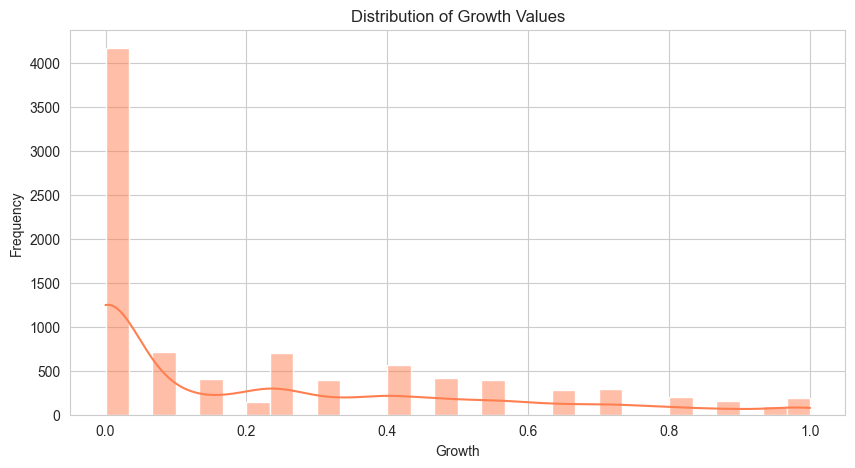

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['Growth'], bins=30, kde=True, color='coral')
plt.title("Distribution of Growth Values")
plt.xlabel("Growth")
plt.ylabel("Frequency")
plt.show()


Potential                   0.585159
Pace / Diving               0.165077
Sprint_speed                0.162916
Acceleration                0.158543
Release_clause              0.140427
                              ...   
Number_of_playstyles       -0.183555
Physical / Positioning     -0.211169
Age                        -0.825427
Weak_foot                        NaN
International_reputation         NaN
Name: Growth, Length: 73, dtype: float64


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_39944/72789985.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=growth_corr_sorted.values, y=growth_corr_sorted.index, palette='coolwarm')


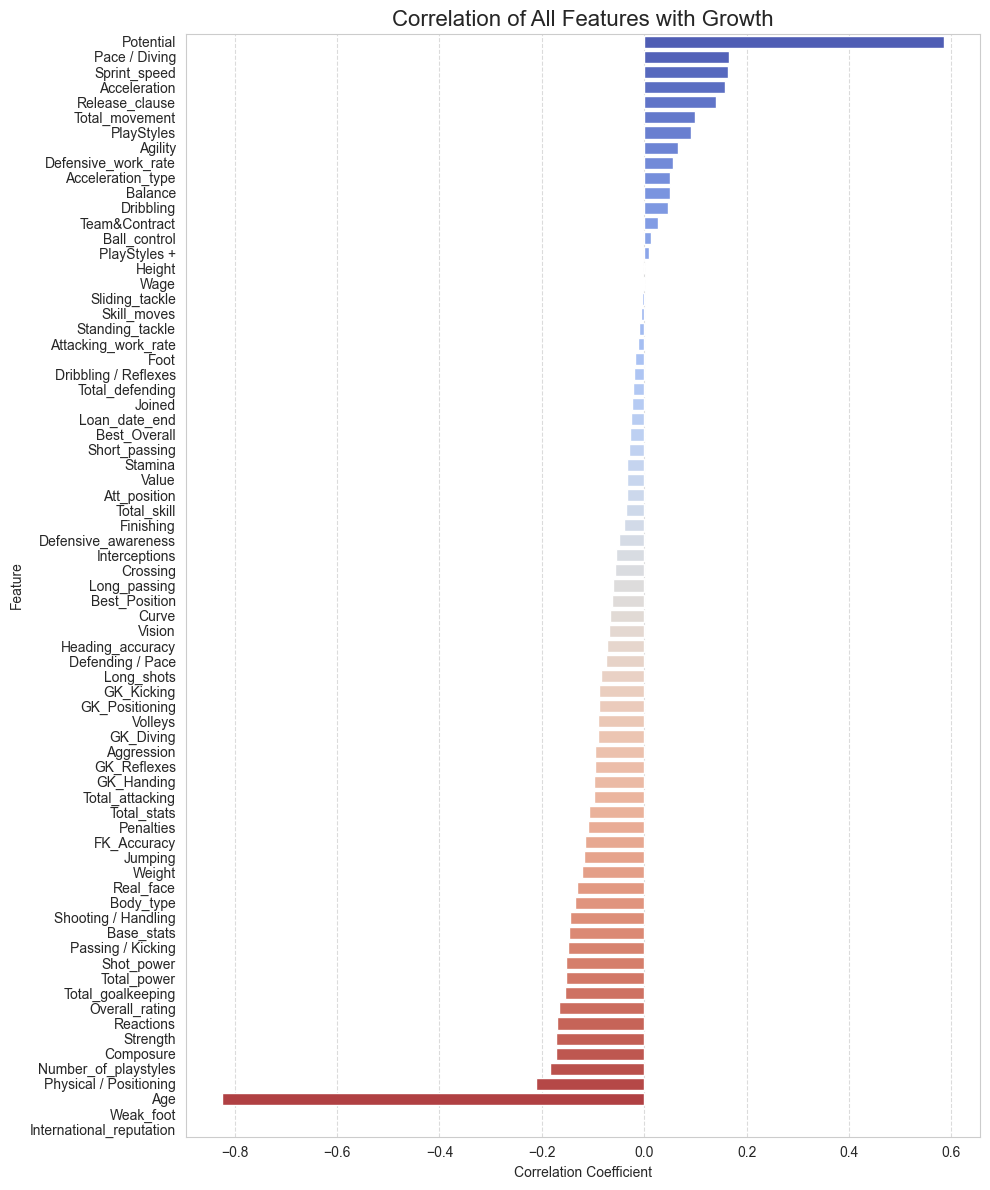

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Extract only correlations with 'Growth'
growth_corr = corr_matrix['Growth'].drop('Growth')  # exclude self-correlation

# Sort by correlation strength
growth_corr_sorted = growth_corr.sort_values(ascending=False)

# Display the values
print(growth_corr_sorted)

# Optional: Bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x=growth_corr_sorted.values, y=growth_corr_sorted.index, palette='coolwarm')
plt.title('Correlation of All Features with Growth', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Top 20 Features by Score:
                   Feature         Score
0                      Age  19558.858221
2                Potential   4763.415750
68  Physical / Positioning    426.968962
71    Number_of_playstyles    318.965638
43               Composure    282.477273
36                Strength    278.704520
30               Reactions    276.756824
1           Overall_rating    262.681927
63           Pace / Diving    256.268723
28            Sprint_speed    249.424080
27            Acceleration    235.870802
48       Total_goalkeeping    226.258283
32             Total_power    221.066286
33              Shot_power    217.910066
65       Passing / Kicking    205.482845
55              Base_stats    200.657223
64     Shooting / Handling    198.644219
13          Release_clause    184.025473
61               Body_type    171.508596
62               Real_face    162.934580


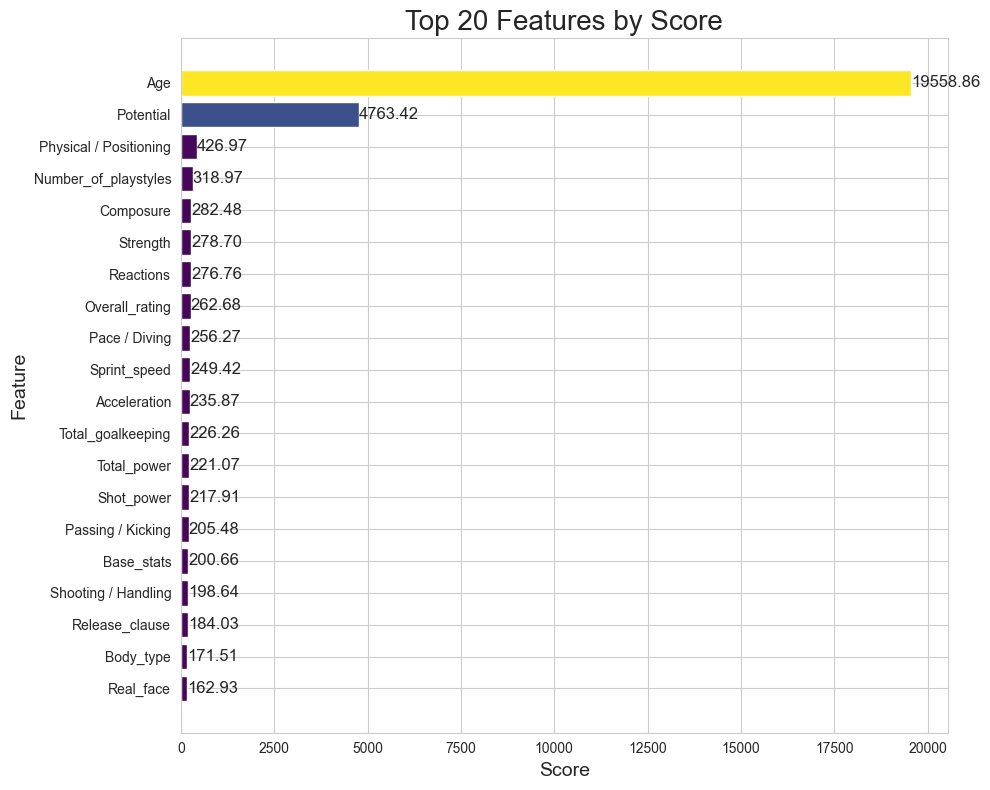


Regression Metrics:
Mean Squared Error (MSE): 0.0015
R^2 Score: 0.9820


In [50]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Sélection des données
X = df.drop(columns=['Growth'])
y = df['Growth']

# Appliquer SelectKBest avec le test F-régression
selector = SelectKBest(score_func=f_regression, k=20)   
X_new = selector.fit_transform(X, y)

# Création d'un DataFrame avec les scores de chaque caractéristique
feature_scores = pd.DataFrame({"Feature": X.columns, "Score": selector.scores_})

# Afficher les 20 meilleures caractéristiques
top_features = feature_scores.nlargest(20, 'Score').sort_values(by='Score', ascending=False)  # Trier du plus grand au plus petit
print("Top 20 Features by Score:")
print(top_features)

# Tracer un graphique avec Matplotlib
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure

# Créer le graphique à barres horizontales
plt.barh(top_features['Feature'], top_features['Score'], color=plt.cm.viridis(top_features['Score'] / max(top_features['Score'])))

# Ajouter des titres et des labels
plt.title('Top 20 Features by Score', fontsize=20)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Ajouter les valeurs des scores sur les barres
for index, value in enumerate(top_features['Score']):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=12)

# Inverser l'ordre des barres (plus grandes en haut)
plt.gca().invert_yaxis()

# Améliorer la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

# Sélectionner les meilleures caractéristiques pour l'entraînement
X_selected = X[top_features['Feature']]

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialiser le modèle de régression (Random Forest Regressor)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle
rf.fit(X_train, y_train)

# Faire des prédictions
y_pred = rf.predict(X_test)

# Calculer les métriques
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats des métriques
print("\nRegression Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Regression Metrics:
Mean Squared Error: 0.0018
R^2 Score: 0.9771


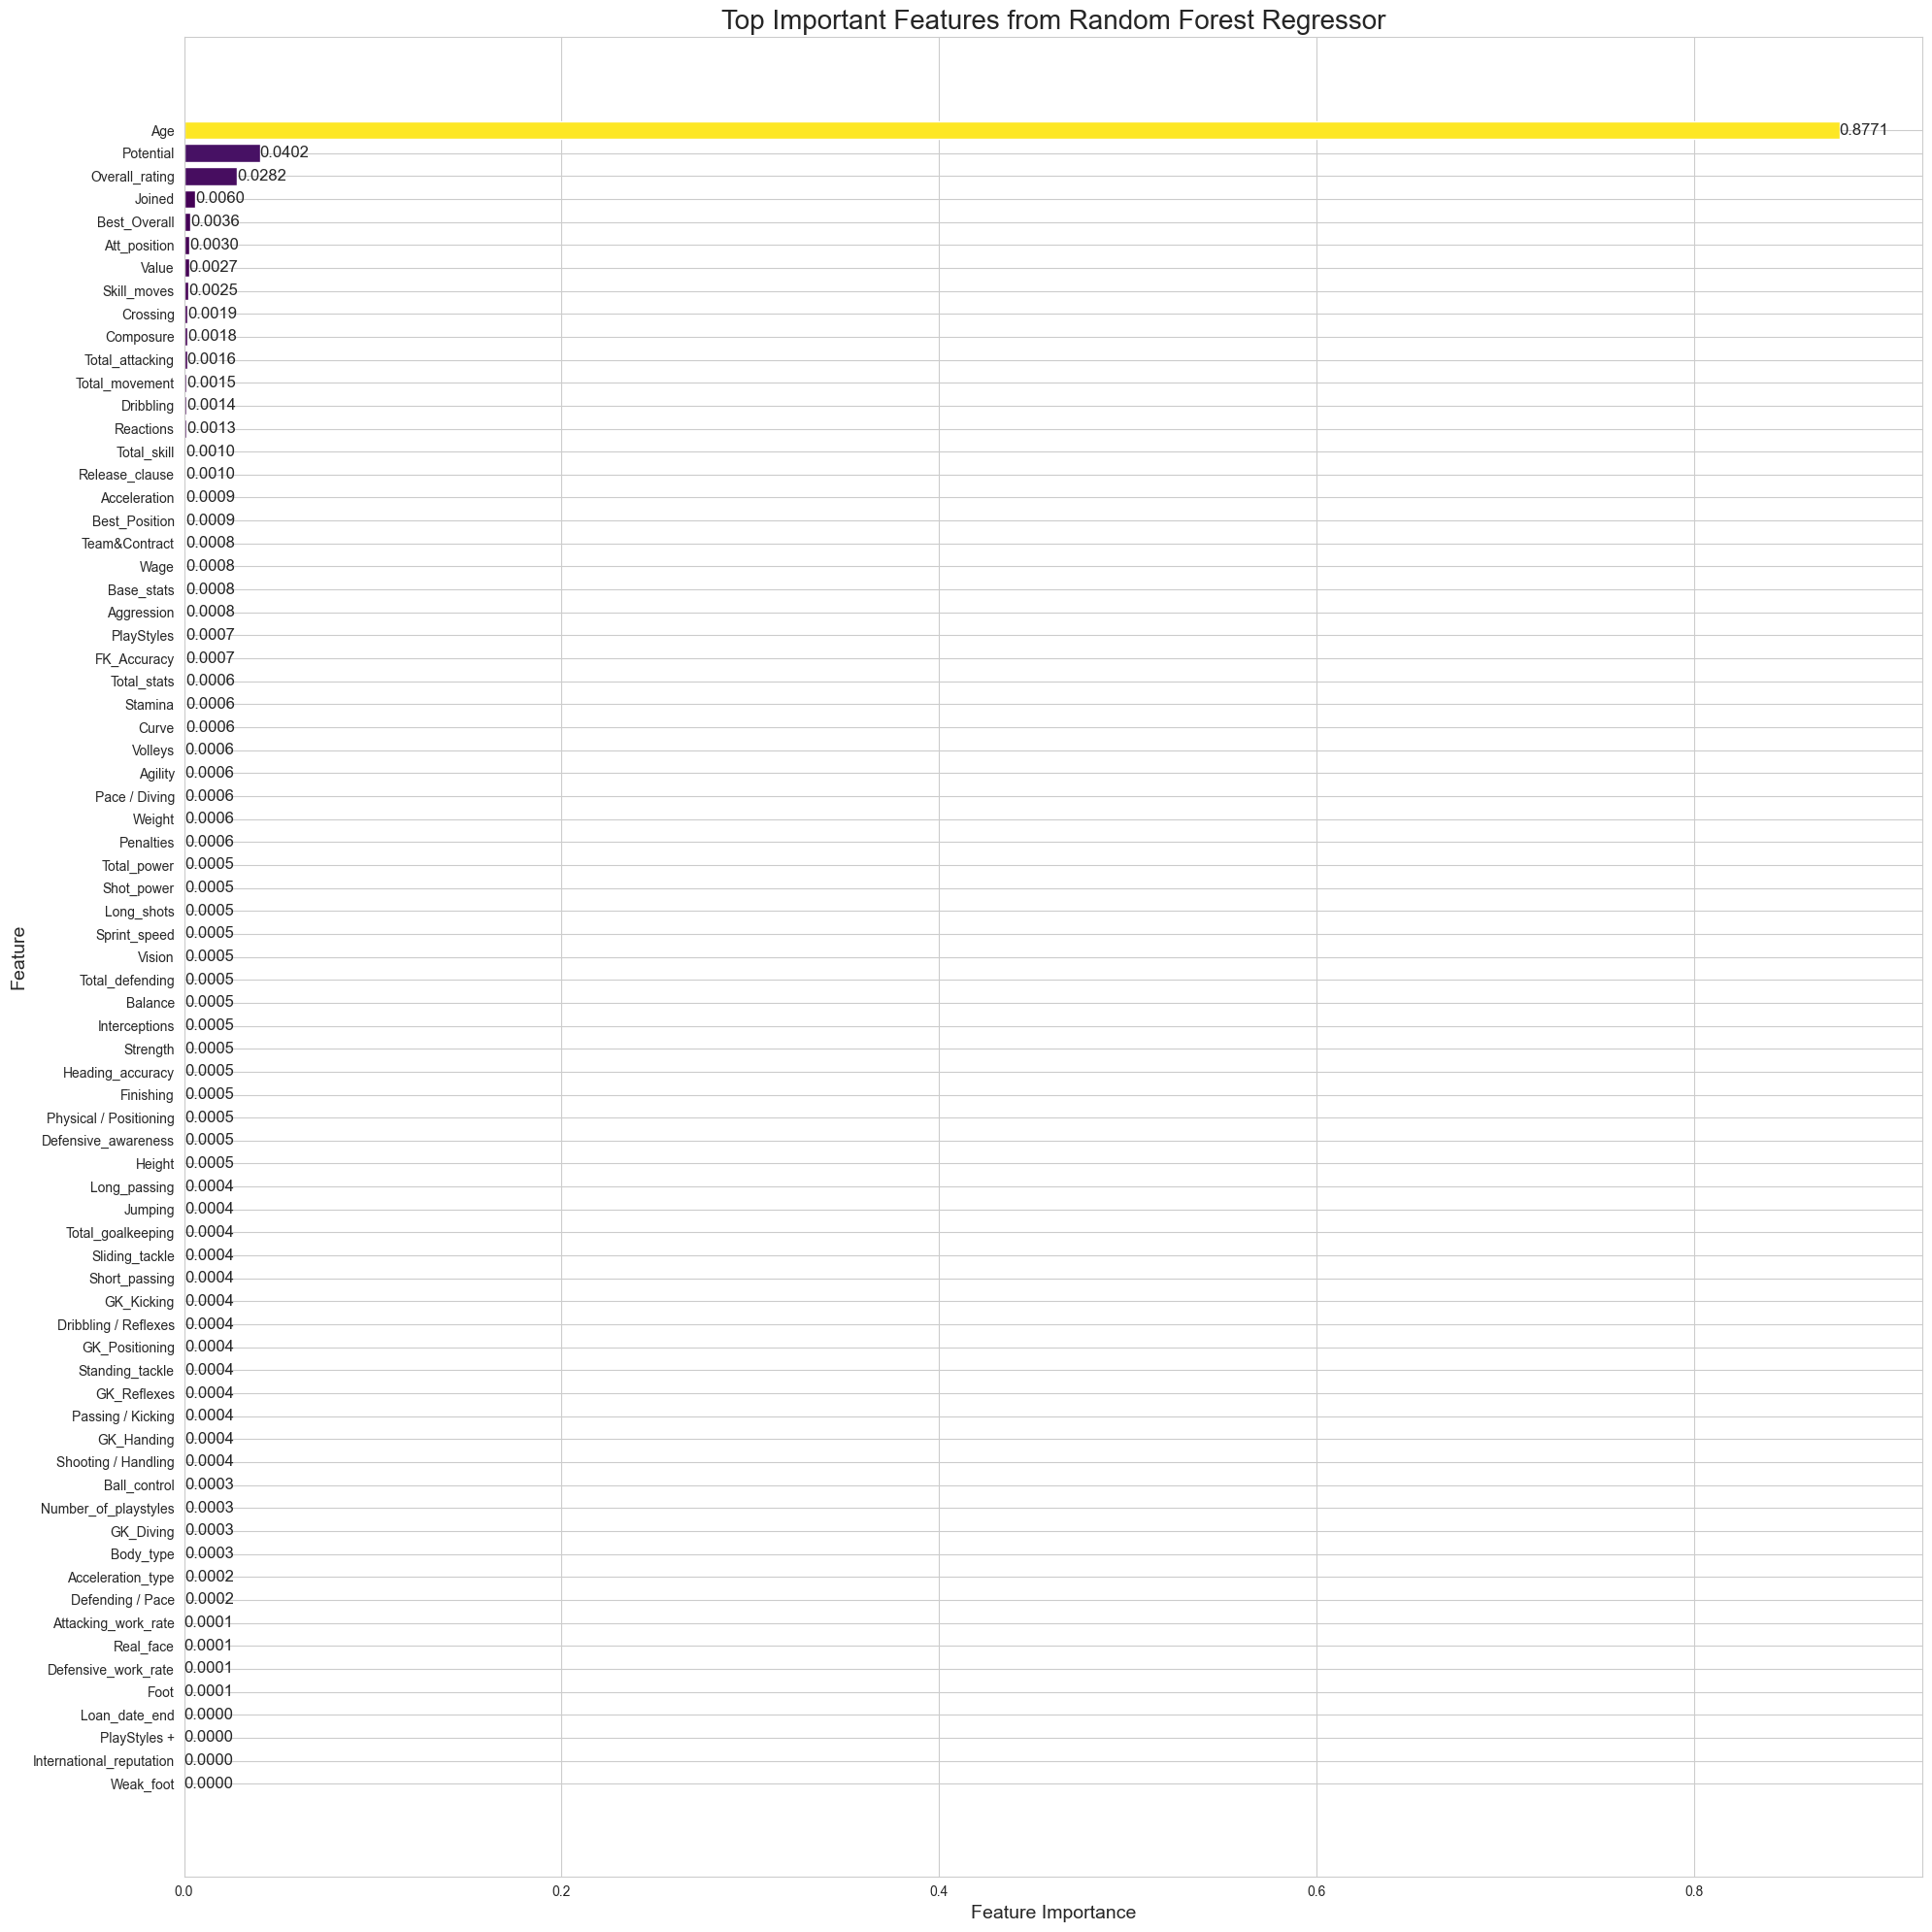

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe 'df' contains the data

# Select features and target variable
X = df.drop(columns=['Growth'])
y = df['Growth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Regression Metrics:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Feature importance visualization
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Correct columns for feature importance
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plotting the feature importance using Matplotlib
plt.figure(figsize=(20, 20))  # Adjust figure size

# Create a horizontal bar chart
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=plt.cm.viridis(feature_importance['Importance'] / max(feature_importance['Importance'])))

# Add titles and labels
plt.title('Top Important Features from Random Forest Regressor', fontsize=20)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Add score annotations on the bars
for index, value in enumerate(feature_importance['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center', fontsize=12)

# Invert y-axis to have the most important features at the top
plt.gca().invert_yaxis()

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


## LinearRegression


In [54]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# Your feature selection result
selected_features = [
    'Age', 'Potential', 'Physical / Positioning', 'Number_of_playstyles', 'Composure', 
    'Strength', 'Reactions', 'Overall_rating', 'Pace / Diving', 'Sprint_speed', 
    'Acceleration', 'Total_goalkeeping', 'Total_power', 'Shot_power', 'Passing / Kicking', 
    'Base_stats', 'Shooting / Handling', 'Release_clause', 'Body_type', 'Real_face'
]

# Select X and y
X = df[selected_features]
y = df['Growth']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Set up GridSearchCV to tune hyperparameters
param_grid = {
    'fit_intercept': [True, False],  # Experiment with whether to fit an intercept
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Predict on the training and test data
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Calculate and display metrics
# Training metrics
# Calculate and display metrics
# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)  # Manually calculate RMSE

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)  # Manually calculate RMSE


# Display results
print("\nTraining Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"R^2 Score: {train_r2:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f}")

print("\nTest Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"R^2 Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")


Best Hyperparameters: {'fit_intercept': True}

Training Metrics:
Mean Squared Error (MSE): 0.0012
R^2 Score: 0.9856
Mean Absolute Error (MAE): 0.0157
Root Mean Squared Error (RMSE): 0.0343

Test Metrics:
Mean Squared Error (MSE): 0.0015
R^2 Score: 0.9816
Mean Absolute Error (MAE): 0.0168
Root Mean Squared Error (RMSE): 0.0386


## ridge regression

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Initialize Ridge regression model and create a pipeline
ridge = Ridge()

# Hyperparameters for GridSearch
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100, 1000],  # Regularization strength for the Ridge model
    'ridge__fit_intercept': [True, False],    # Whether to calculate the intercept or not
}

# Create a pipeline with StandardScaler and Ridge regression
pipeline = make_pipeline(StandardScaler(), ridge)

# Perform Grid Search with Cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {-grid_search.best_score_:.4f}")

# Get the best model from grid search
best_ridge_model = grid_search.best_estimator_

# Predict on training and test data
y_train_pred = best_ridge_model.predict(X_train)
y_test_pred = best_ridge_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)  # Manually calculate RMSE

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)  # Manually calculate RMSE

# Display the results
print("\nTraining Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"R^2 Score: {train_r2:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f}")

print("\nTest Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"R^2 Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")


Best Parameters: {'ridge__alpha': 0.1, 'ridge__fit_intercept': True}
Best Cross-validation Score: 0.0012

Training Metrics:
Mean Squared Error (MSE): 0.0012
R^2 Score: 0.9856
Mean Absolute Error (MAE): 0.0157
Root Mean Squared Error (RMSE): 0.0343

Test Metrics:
Mean Squared Error (MSE): 0.0015
R^2 Score: 0.9816
Mean Absolute Error (MAE): 0.0168
Root Mean Squared Error (RMSE): 0.0386


## Lasso Regression

In [58]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Initialize Lasso regression model and create a pipeline
lasso = Lasso()

# Hyperparameters for GridSearch
param_grid = {
    'lasso__alpha': [0.1, 1, 10, 100, 1000],  # Regularization strength for the Lasso model
    'lasso__fit_intercept': [True, False],    # Whether to calculate the intercept or not
}

# Create a pipeline with StandardScaler and Lasso regression
pipeline = make_pipeline(StandardScaler(), lasso)

# Perform Grid Search with Cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {-grid_search.best_score_:.4f}")

# Get the best model from grid search
best_lasso_model = grid_search.best_estimator_

# Predict on training and test data
y_train_pred = best_lasso_model.predict(X_train)
y_test_pred = best_lasso_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)  # Manually calculate RMSE

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)  # Manually calculate RMSE

# Display the results
print("\nTraining Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"R^2 Score: {train_r2:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f}")

print("\nTest Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"R^2 Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")


Best Parameters: {'lasso__alpha': 0.1, 'lasso__fit_intercept': True}
Best Cross-validation Score: 0.0363

Training Metrics:
Mean Squared Error (MSE): 0.0363
R^2 Score: 0.5576
Mean Absolute Error (MAE): 0.1485
Root Mean Squared Error (RMSE): 0.1904

Test Metrics:
Mean Squared Error (MSE): 0.0356
R^2 Score: 0.5604
Mean Absolute Error (MAE): 0.1486
Root Mean Squared Error (RMSE): 0.1886


## DecisionTreeRegressor

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {-grid_search.best_score_:.4f}")

# Get the best model from grid search
best_dt_model = grid_search.best_estimator_

# Predict on training and test data
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# Display the results
print("\n📊 Training Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"R^2 Score: {train_r2:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f}")

print("\n📈 Test Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"R^2 Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-validation Score: 0.0028

📊 Training Metrics:
Mean Squared Error (MSE): 0.0006
R^2 Score: 0.9925
Mean Absolute Error (MAE): 0.0106
Root Mean Squared Error (RMSE): 0.0248

📈 Test Metrics:
Mean Squared Error (MSE): 0.0025
R^2 Score: 0.9697
Mean Absolute Error (MAE): 0.0226
Root Mean Squared Error (RMSE): 0.0495


## RandomForestRegressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search with Cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {-grid_search.best_score_:.4f}")

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Predict on training and test data
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# Display the results
print("\n📊 Training Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"R^2 Score: {train_r2:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f}")

print("\n📈 Test Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"R^2 Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score: 0.0018

📊 Training Metrics:
Mean Squared Error (MSE): 0.0002
R^2 Score: 0.9973
Mean Absolute Error (MAE): 0.0078
Root Mean Squared Error (RMSE): 0.0148

📈 Test Metrics:
Mean Squared Error (MSE): 0.0015
R^2 Score: 0.9819
Mean Absolute Error (MAE): 0.0209
Root Mean Squared Error (RMSE): 0.0383


## GradientBoostingRegressor
 

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search with cross-validation
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {-grid_search.best_score_:.4f}")

# Best model
best_gbr_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_gbr_model.predict(X_train)
y_test_pred = best_gbr_model.predict(X_test)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# Display results
print("\n📊 Training Metrics:")
print(f"MSE: {train_mse:.4f}")
print(f"R²: {train_r2:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")

print("\n📈 Test Metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"R²: {test_r2:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score: 0.0004

📊 Training Metrics:
MSE: 0.0001
R²: 0.9987
MAE: 0.0065
RMSE: 0.0102

📈 Test Metrics:
MSE: 0.0004
R²: 0.9953
MAE: 0.0106
RMSE: 0.0195


## XGBRegressor

In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the XGBoost Regressor
xgb = XGBRegressor(random_state=42, objective='reg:squarederror', verbosity=0)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {-grid_search.best_score_:.4f}")

# Best model
best_xgb_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# Display results
print("\n📊 Training Metrics:")
print(f"MSE: {train_mse:.4f}")
print(f"R²: {train_r2:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")

print("\n📈 Test Metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"R²: {test_r2:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-validation Score: 0.0004

📊 Training Metrics:
MSE: 0.0001
R²: 0.9986
MAE: 0.0067
RMSE: 0.0106

📈 Test Metrics:
MSE: 0.0004
R²: 0.9952
MAE: 0.0110
RMSE: 0.0197


 ## SVR

In [65]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the pipeline
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Define parameter grid for SVR
param_grid = {
    'svr__kernel': ['rbf'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2, 0.5],
    'svr__gamma': ['scale', 'auto']
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best estimator
best_svr = grid_search.best_estimator_

# Predictions
y_train_pred = best_svr.predict(X_train)
y_test_pred = best_svr.predict(X_test)

# Compute metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# Output metrics
print(f"\n✅ Best Parameters: {grid_search.best_params_}")
print("\n📊 Training Metrics:")
print(f"MSE: {train_mse:.4f}")
print(f"R²: {train_r2:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")

print("\n📈 Test Metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"R²: {test_r2:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits

✅ Best Parameters: {'svr__C': 1, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}

📊 Training Metrics:
MSE: 0.0023
R²: 0.9725
MAE: 0.0384
RMSE: 0.0475

📈 Test Metrics:
MSE: 0.0028
R²: 0.9654
MAE: 0.0411
RMSE: 0.0529


## KNeighborsRegressor

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Define parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # Manhattan (p=1) and Euclidean (p=2)
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_knn = grid_search.best_estimator_

# Predictions
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Compute metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# Output results
print(f"\n✅ Best Parameters: {grid_search.best_params_}")
print("\n📊 Training Metrics:")
print(f"MSE: {train_mse:.4f}")
print(f"R²: {train_r2:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")

print("\n📈 Test Metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"R²: {test_r2:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits

✅ Best Parameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}

📊 Training Metrics:
MSE: 0.0000
R²: 1.0000
MAE: 0.0000
RMSE: 0.0000

📈 Test Metrics:
MSE: 0.0089
R²: 0.8904
MAE: 0.0644
RMSE: 0.0942
